# Imports

In [1]:
import os
import json
import pandas as pd
import numpy as np
from utils.globals import *
from utils.prompt_utils import AmbigousARCDataset
from utils.plot_utils import plot_item
from utils.eval import Eval, ModelEval
from utils.globals import ITEMS_FILE, RESULTS_DIR
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import print_function
from ipywidgets import interactive, IntSlider
mpl.rcParams['figure.dpi'] = 300

runs = [i for i in os.listdir(RESULTS_DIR) if i != '.DS_Store']
run_widget = interactive(lambda run: run, run=runs)
display(run_widget)

interactive(children=(Dropdown(description='run', options=('old', 'run_2024-10-23'), value='old'), Output()), …

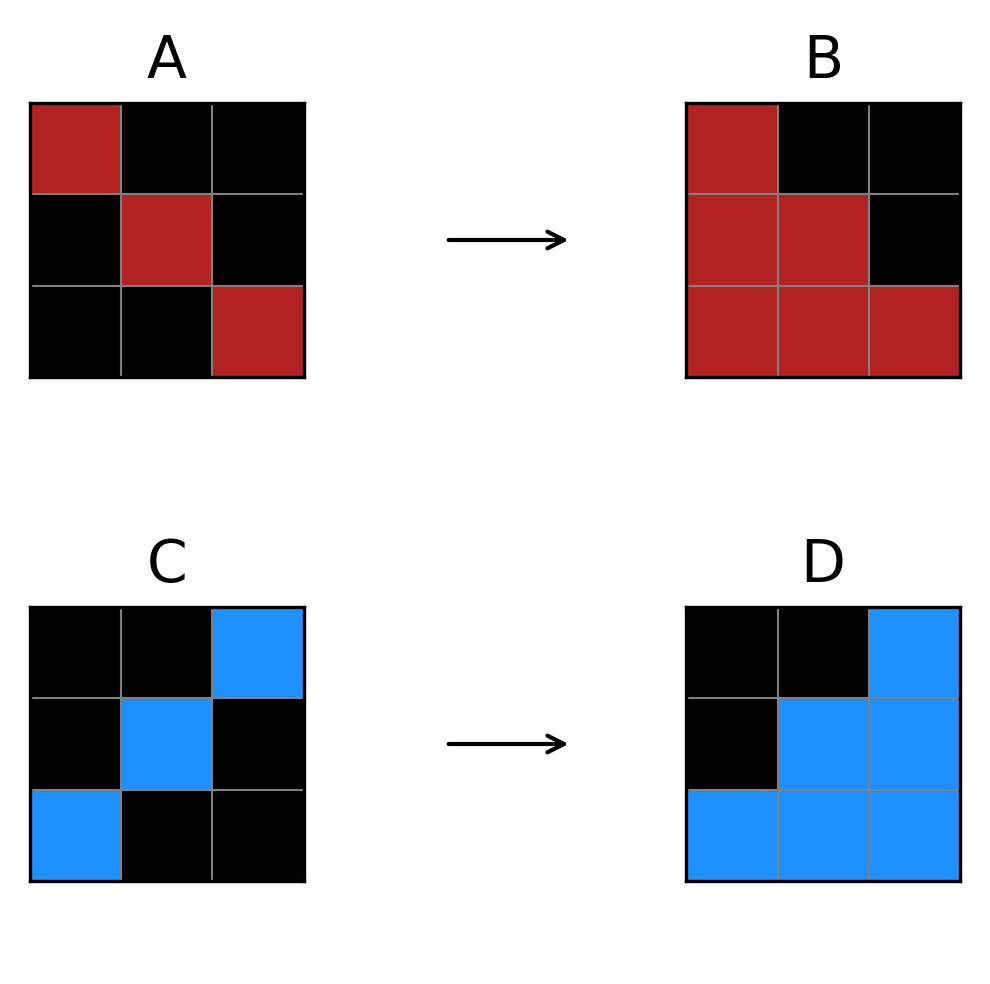

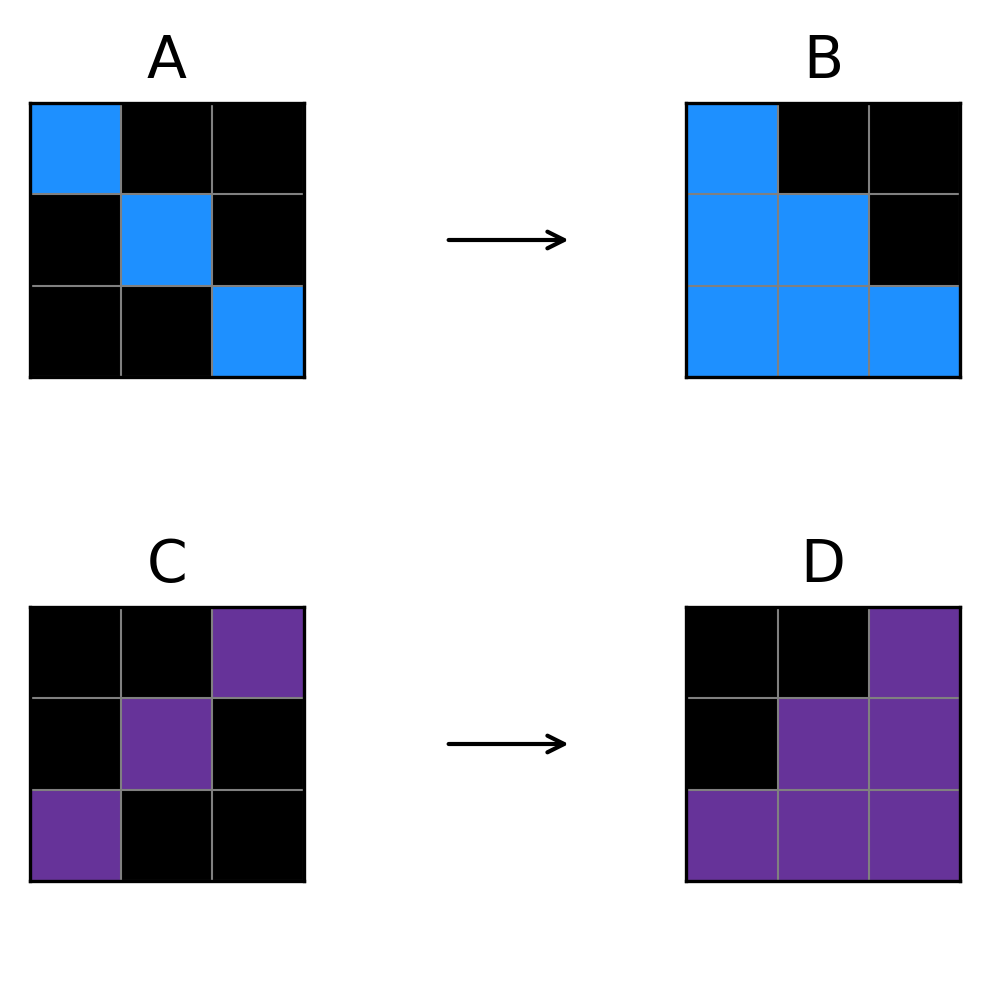

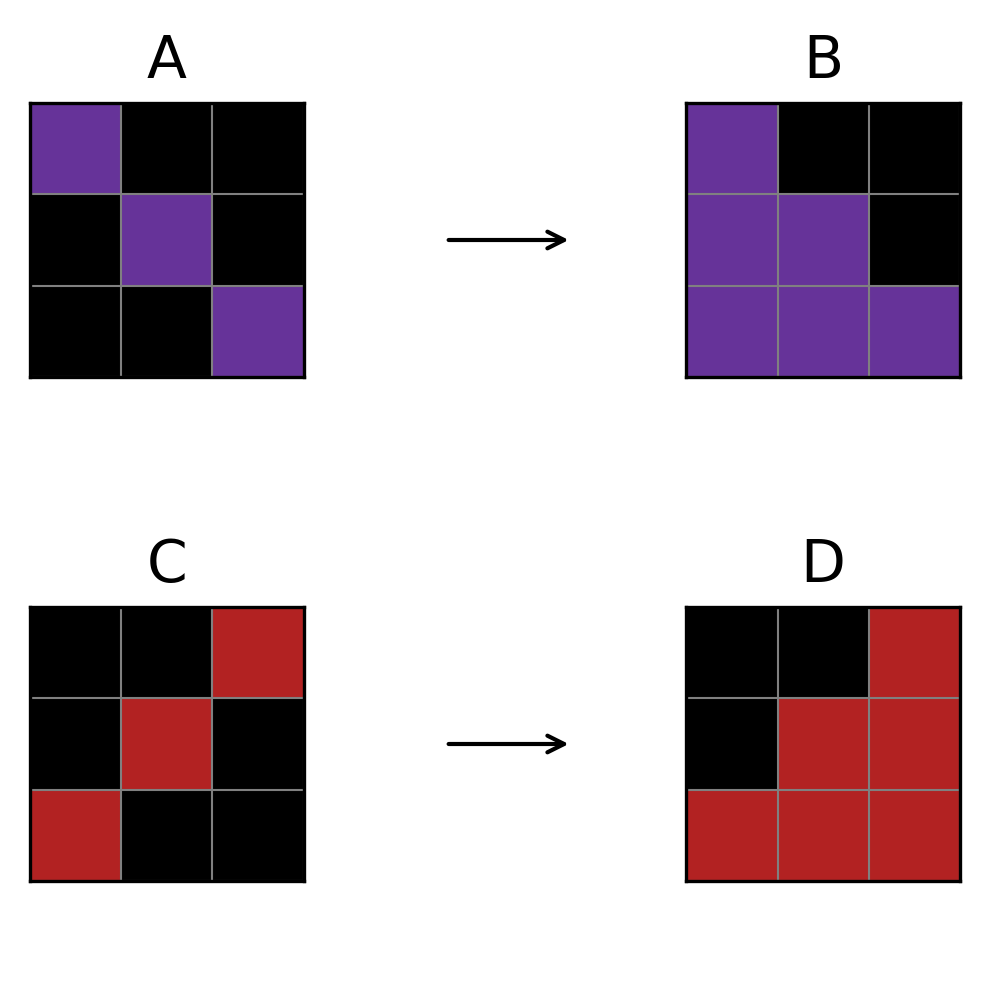

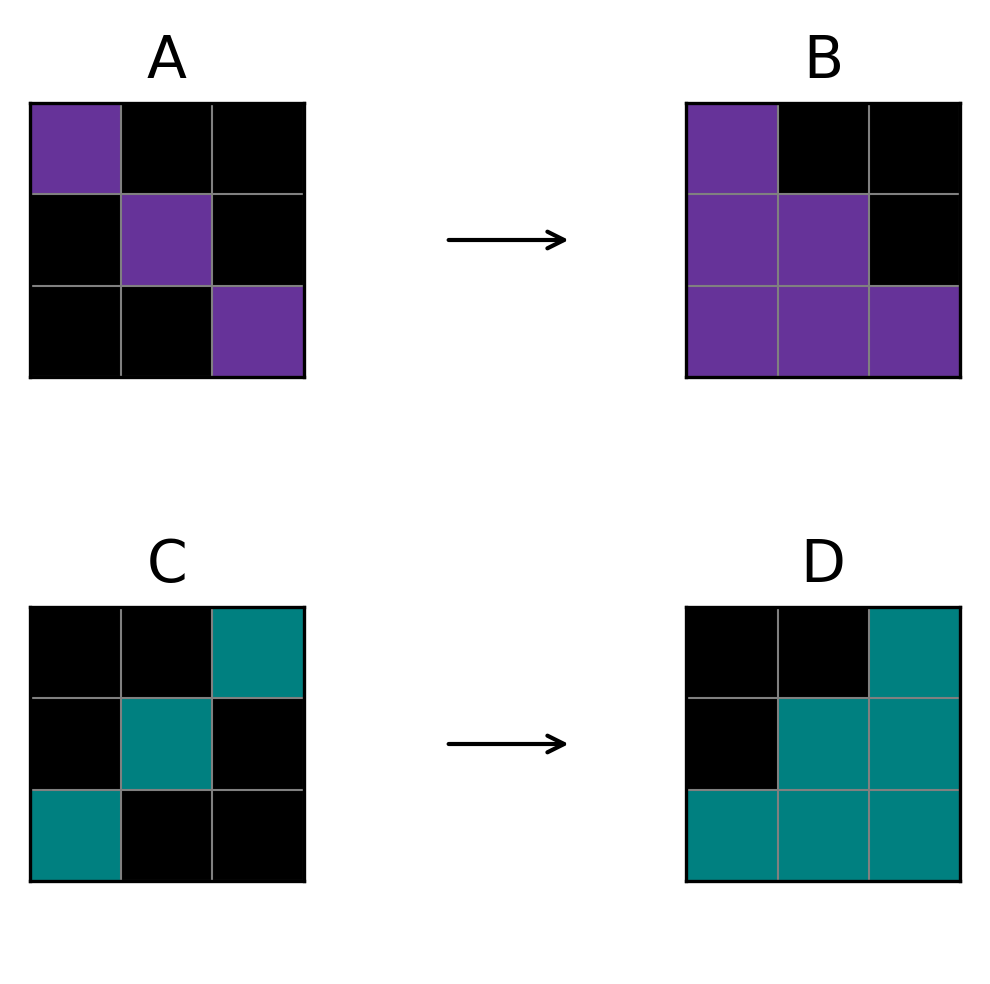

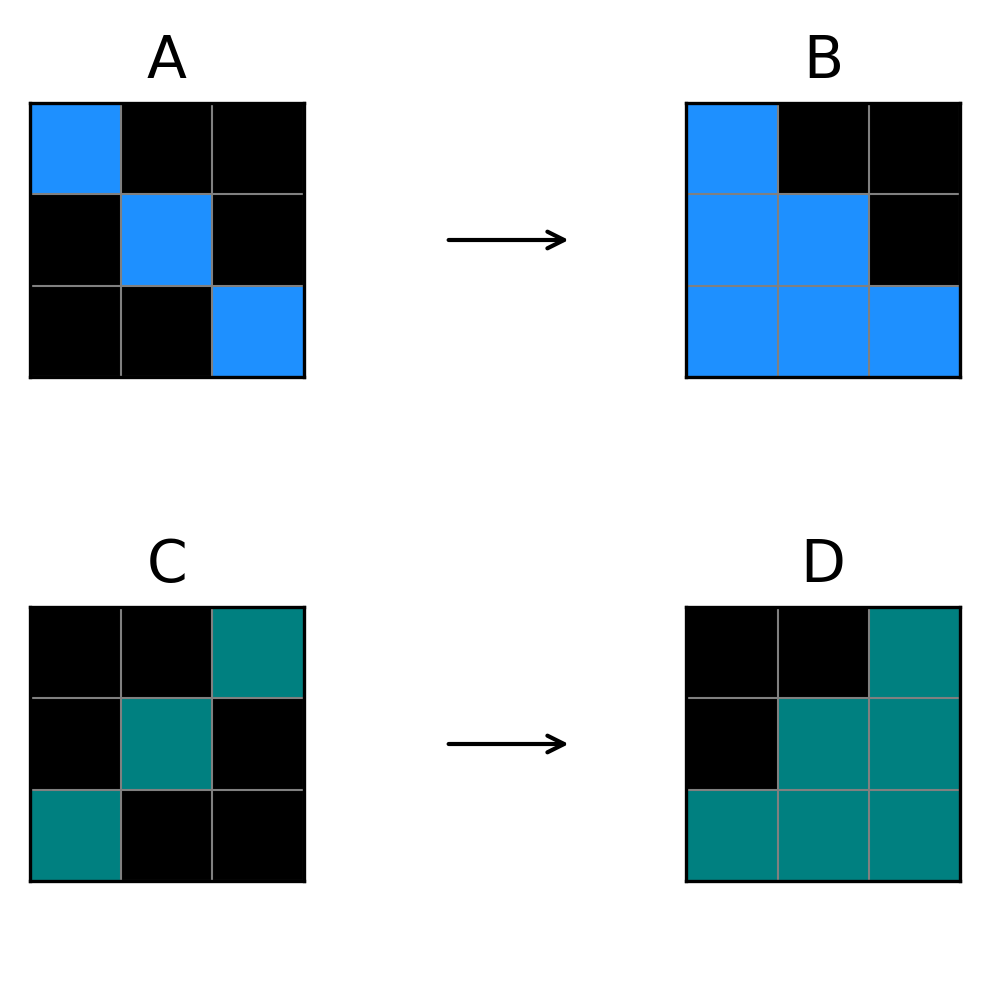

In [163]:
recognition.dataset.plot(353, show_mirrors=True)

In [162]:
print(generation.dataset.x[353])

EXAMPLE TASK:

Input 1: [0 0 0] [5 5 5] [4 0 4]
Output 1: [0 0 0] [5 5 5] [0 0 0]
Input 2: [5 5 5] [4 0 4] [4 4 0]
Output 2:

Answer: [5 5 5] [0 0 0] [0 0 0]

TEST TASK:

Input 1: [6 0 0] [0 6 0] [0 0 6]
Output 1: [6 0 0] [6 6 0] [6 6 6]
Input 2: [0 0 4] [0 4 0] [4 0 0]
Output 2:

Answer: 


In [158]:
discrimination.dataset.size

545

In [152]:
concept_sum = []
for idx, i in enumerate(recognition.dataset.items_data):
    if i['id'] == 'NITwty_4':
        print(idx)
        concept_sum.append(i['concept_sum'])

353


KeyError: 'concept_sum'

In [135]:
concept

NameError: name 'concept' is not defined

In [132]:
len(concept_sum)

66

In [125]:
recognition.dataset.items_data

[{'id': '02ue5B_1',
  'A': '2222011100111112000022000',
  'B': '2000022000111002222011111',
  'C': '3330033333600003300066660',
  'D_Matrix': '2000022033111003222011111',
  'D_Concept': '6000033000333006666033333',
  'concept': 'order',
  'xdim': 5,
  'ydim': 5},
 {'id': '02ue5B_2',
  'A': '7777055500555557000077000',
  'B': '7000077000555007777055555',
  'C': '4440044444300004400033330',
  'D_Matrix': '7000077044555004777055555',
  'D_Concept': '3000044000444003333044444',
  'concept': 'order',
  'xdim': 5,
  'ydim': 5},
 {'id': '02ue5B_3',
  'A': '1111066600666661000011000',
  'B': '1000011000666001111066666',
  'C': '7770077777300007700033330',
  'D_Matrix': '1000011077666007111066666',
  'D_Concept': '3000077000777003333077777',
  'concept': 'order',
  'xdim': 5,
  'ydim': 5},
 {'id': '02ue5B_4',
  'A': '5555066600666665000055000',
  'B': '5000055000666005555066666',
  'C': '2220022222300002200033330',
  'D_Matrix': '5000055022666002555066666',
  'D_Concept': '300002200022200333302

In [124]:
len(np.unique(concept_sum, return_counts=True)[0])

11

In [123]:
len(concept_sum)

109

In [118]:
recognition.df['concept'].value_counts()

concept
order                        360
keep_above_or_below          360
clean_up                     360
foreground_and_background    360
extend_to_boundary           360
copy                         360
fill_in                      300
complete_shape               270
horizontal_and_vertical      180
move_to_boundary             180
inside_and_outside           180
Name: count, dtype: int64

In [38]:
run = run_widget.children[0].value
run_dir= os.path.join(RESULTS_DIR, run)

generation = Eval(os.path.join(run_dir, 'generation.json'), prop_test_thresh=None, no_response_thresh=None)
discrimination = Eval(os.path.join(run_dir, 'discrimination.json'), prop_test_thresh=None, no_response_thresh=None)
recognition = Eval(os.path.join(run_dir, 'recognition.json'), prop_test_thresh=None, no_response_thresh=None)

names = {
    'google/gemma-2-9b-it': 'Gemma-2 9B',
    'google/gemma-2-27b-it': 'Gemma-2 27B',
    'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo': 'Llama-3.1 405B',
    'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo': 'Llama-3.1 70B',
    'Qwen/Qwen1.5-72B-Chat': 'Qwen-1.5 72B',
    'Qwen/Qwen1.5-110B-Chat': 'Qwen-1.5 110B',
}

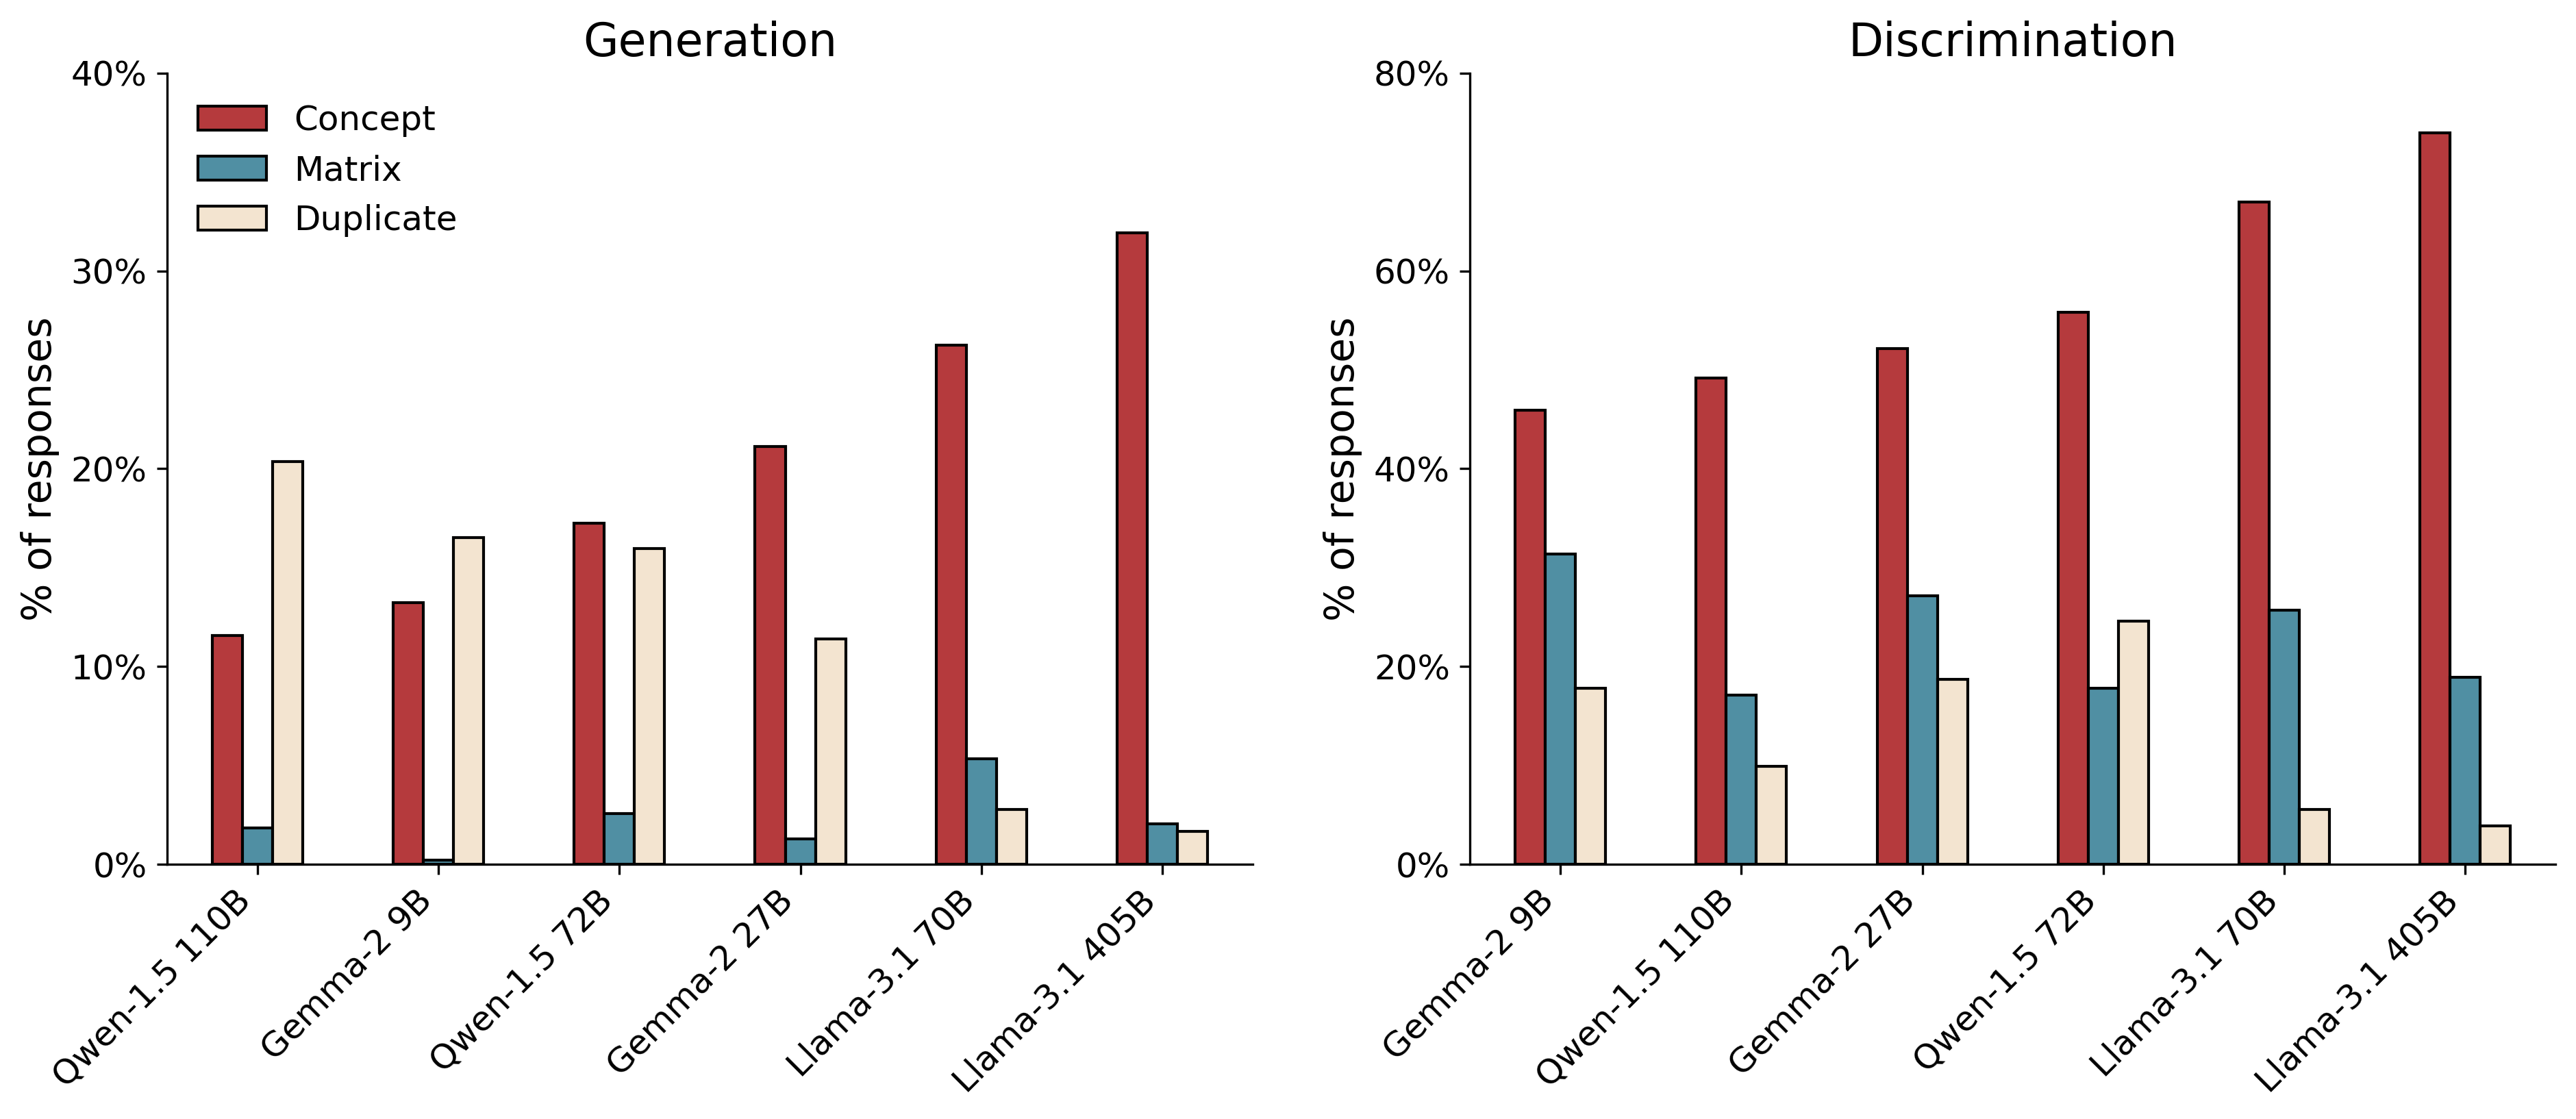

In [108]:
response_cols = ['concept_response', 'matrix_response', 'duplicate_response']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df = generation.df.groupby('model')[response_cols].mean().sort_values('concept_response', ascending=True)
df.plot(kind='bar', stacked=False, color=['#B53A3D', '#508FA3', '#F3E4D0'], ax=ax[0], edgecolor='black')
ax[0].set_title('Generation', fontsize=16)
ax[0].set_ylabel('% of responses', fontsize=14)
ax[0].set_yticks(np.arange(0, 0.5, 0.1), ['{:.0f}%'.format(i*100) for i in np.arange(0, 0.5, 0.1)], fontsize=12)
ax[0].set_xticks(range(len(names)), [names.get(i, i) for i in df.index], rotation=45, ha='right', fontsize=12)
ax[0].set_xlabel('')
# no box around the legend
ax[0].legend(['Concept', 'Matrix', 'Duplicate'], frameon=False, fontsize=12)
# remove the top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


df = discrimination.df.groupby('model')[response_cols].mean().sort_values('concept_response', ascending=True)
df.plot(kind='bar', stacked=False, color=['#B53A3D', '#508FA3', '#F3E4D0'], edgecolor='black', ax=ax[1])
ax[1].set_title('Discrimination', fontsize=16)
ax[1].set_ylabel('% of responses', fontsize=14)
ax[1].set_yticks(np.arange(0, 0.9, 0.2), ['{:.0f}%'.format(i*100) for i in np.arange(0, 0.9, 0.2)], fontsize=12)
ax[1].set_xticks(range(len(names)), [names.get(i, i) for i in df.index], rotation=45, ha='right', fontsize=12)
ax[1].set_xlabel('')
# no box around the legend
ax[1].legend(['Concept', 'Matrix', 'Duplicate'], frameon=False, fontsize=12)
ax[1].legend([], frameon=False)
# remove the top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show()


<Figure size 3000x1500 with 0 Axes>

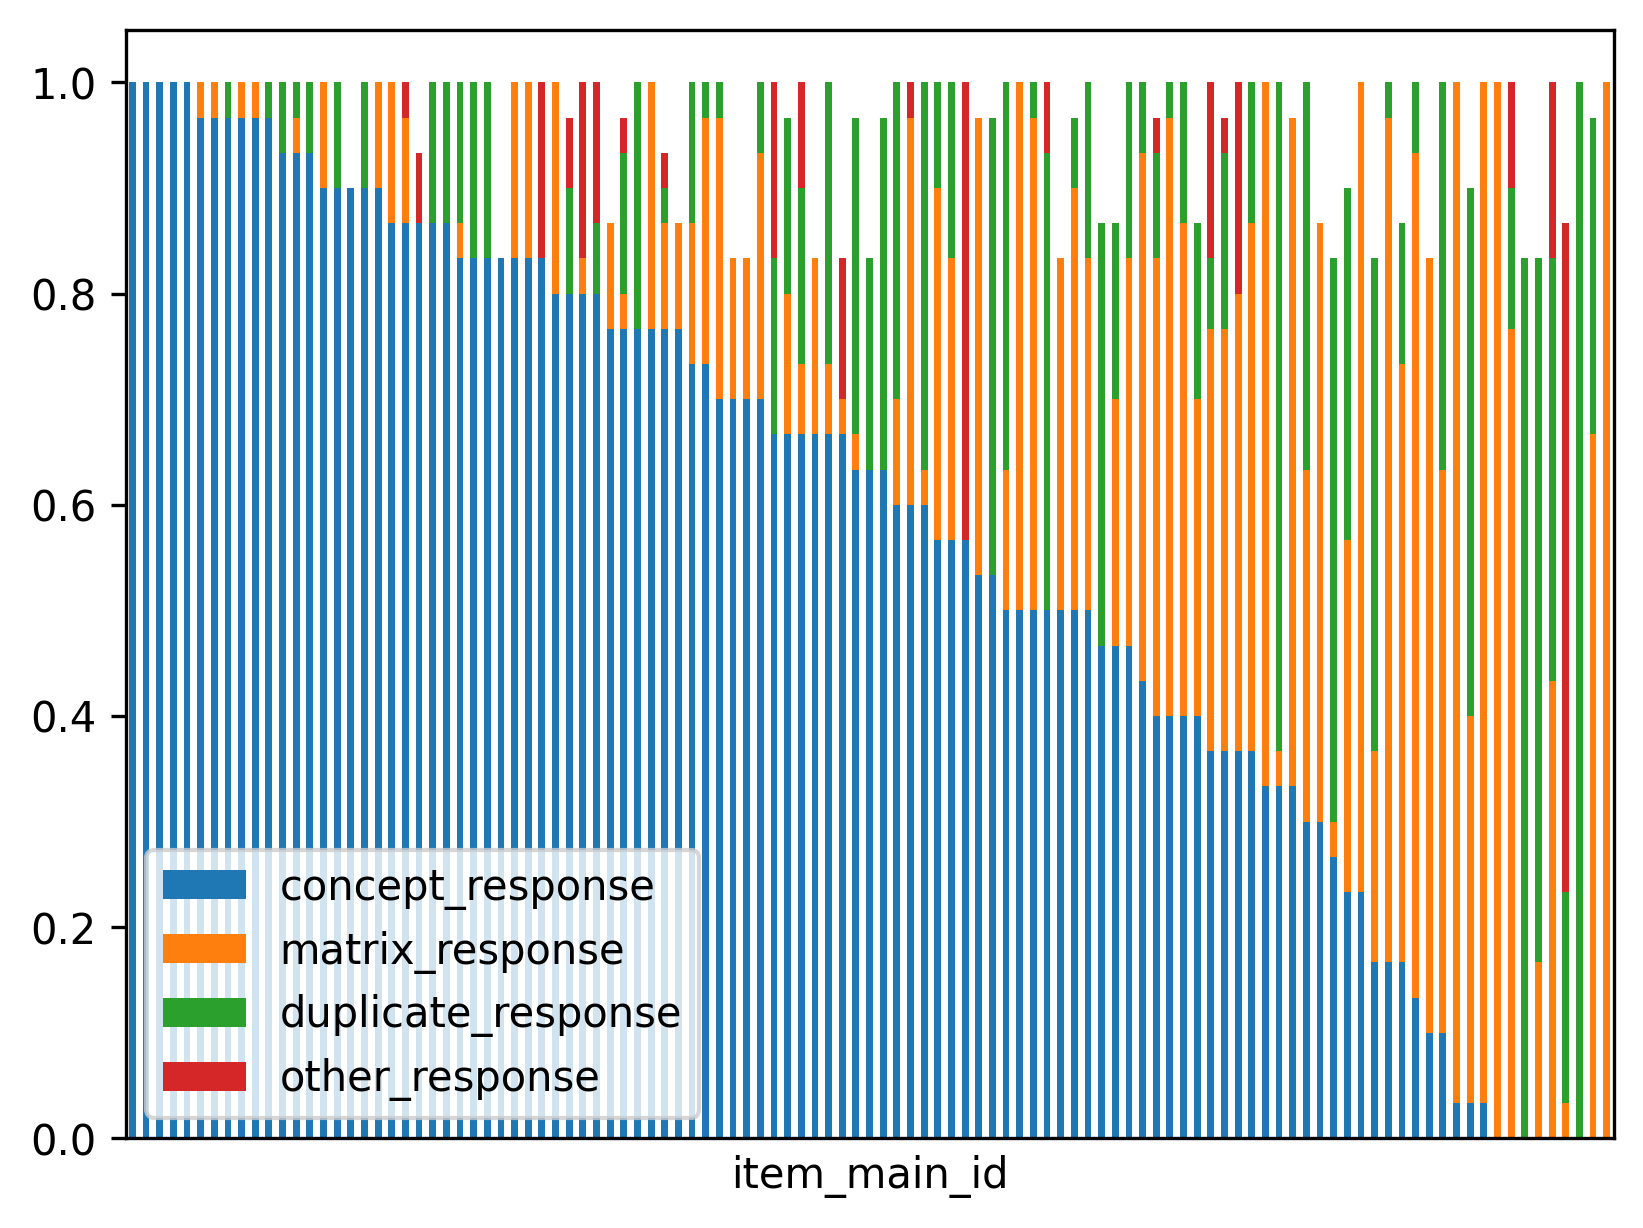

In [6]:
#df = discrimination.df[discrimination.df['model'] == 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo']
plt.figure(figsize=(10, 5))
item_df = discrimination.df.groupby('item_main_id')[['concept_response', 'matrix_response', 'duplicate_response', 'other_response']].mean()
item_df.sort_values('concept_response', ascending=False).plot(kind='bar', stacked=True)
plt.xticks([])
plt.show()

array([[<Axes: title={'center': 'concept_response'}>,
        <Axes: title={'center': 'matrix_response'}>],
       [<Axes: title={'center': 'duplicate_response'}>,
        <Axes: title={'center': 'other_response'}>]], dtype=object)

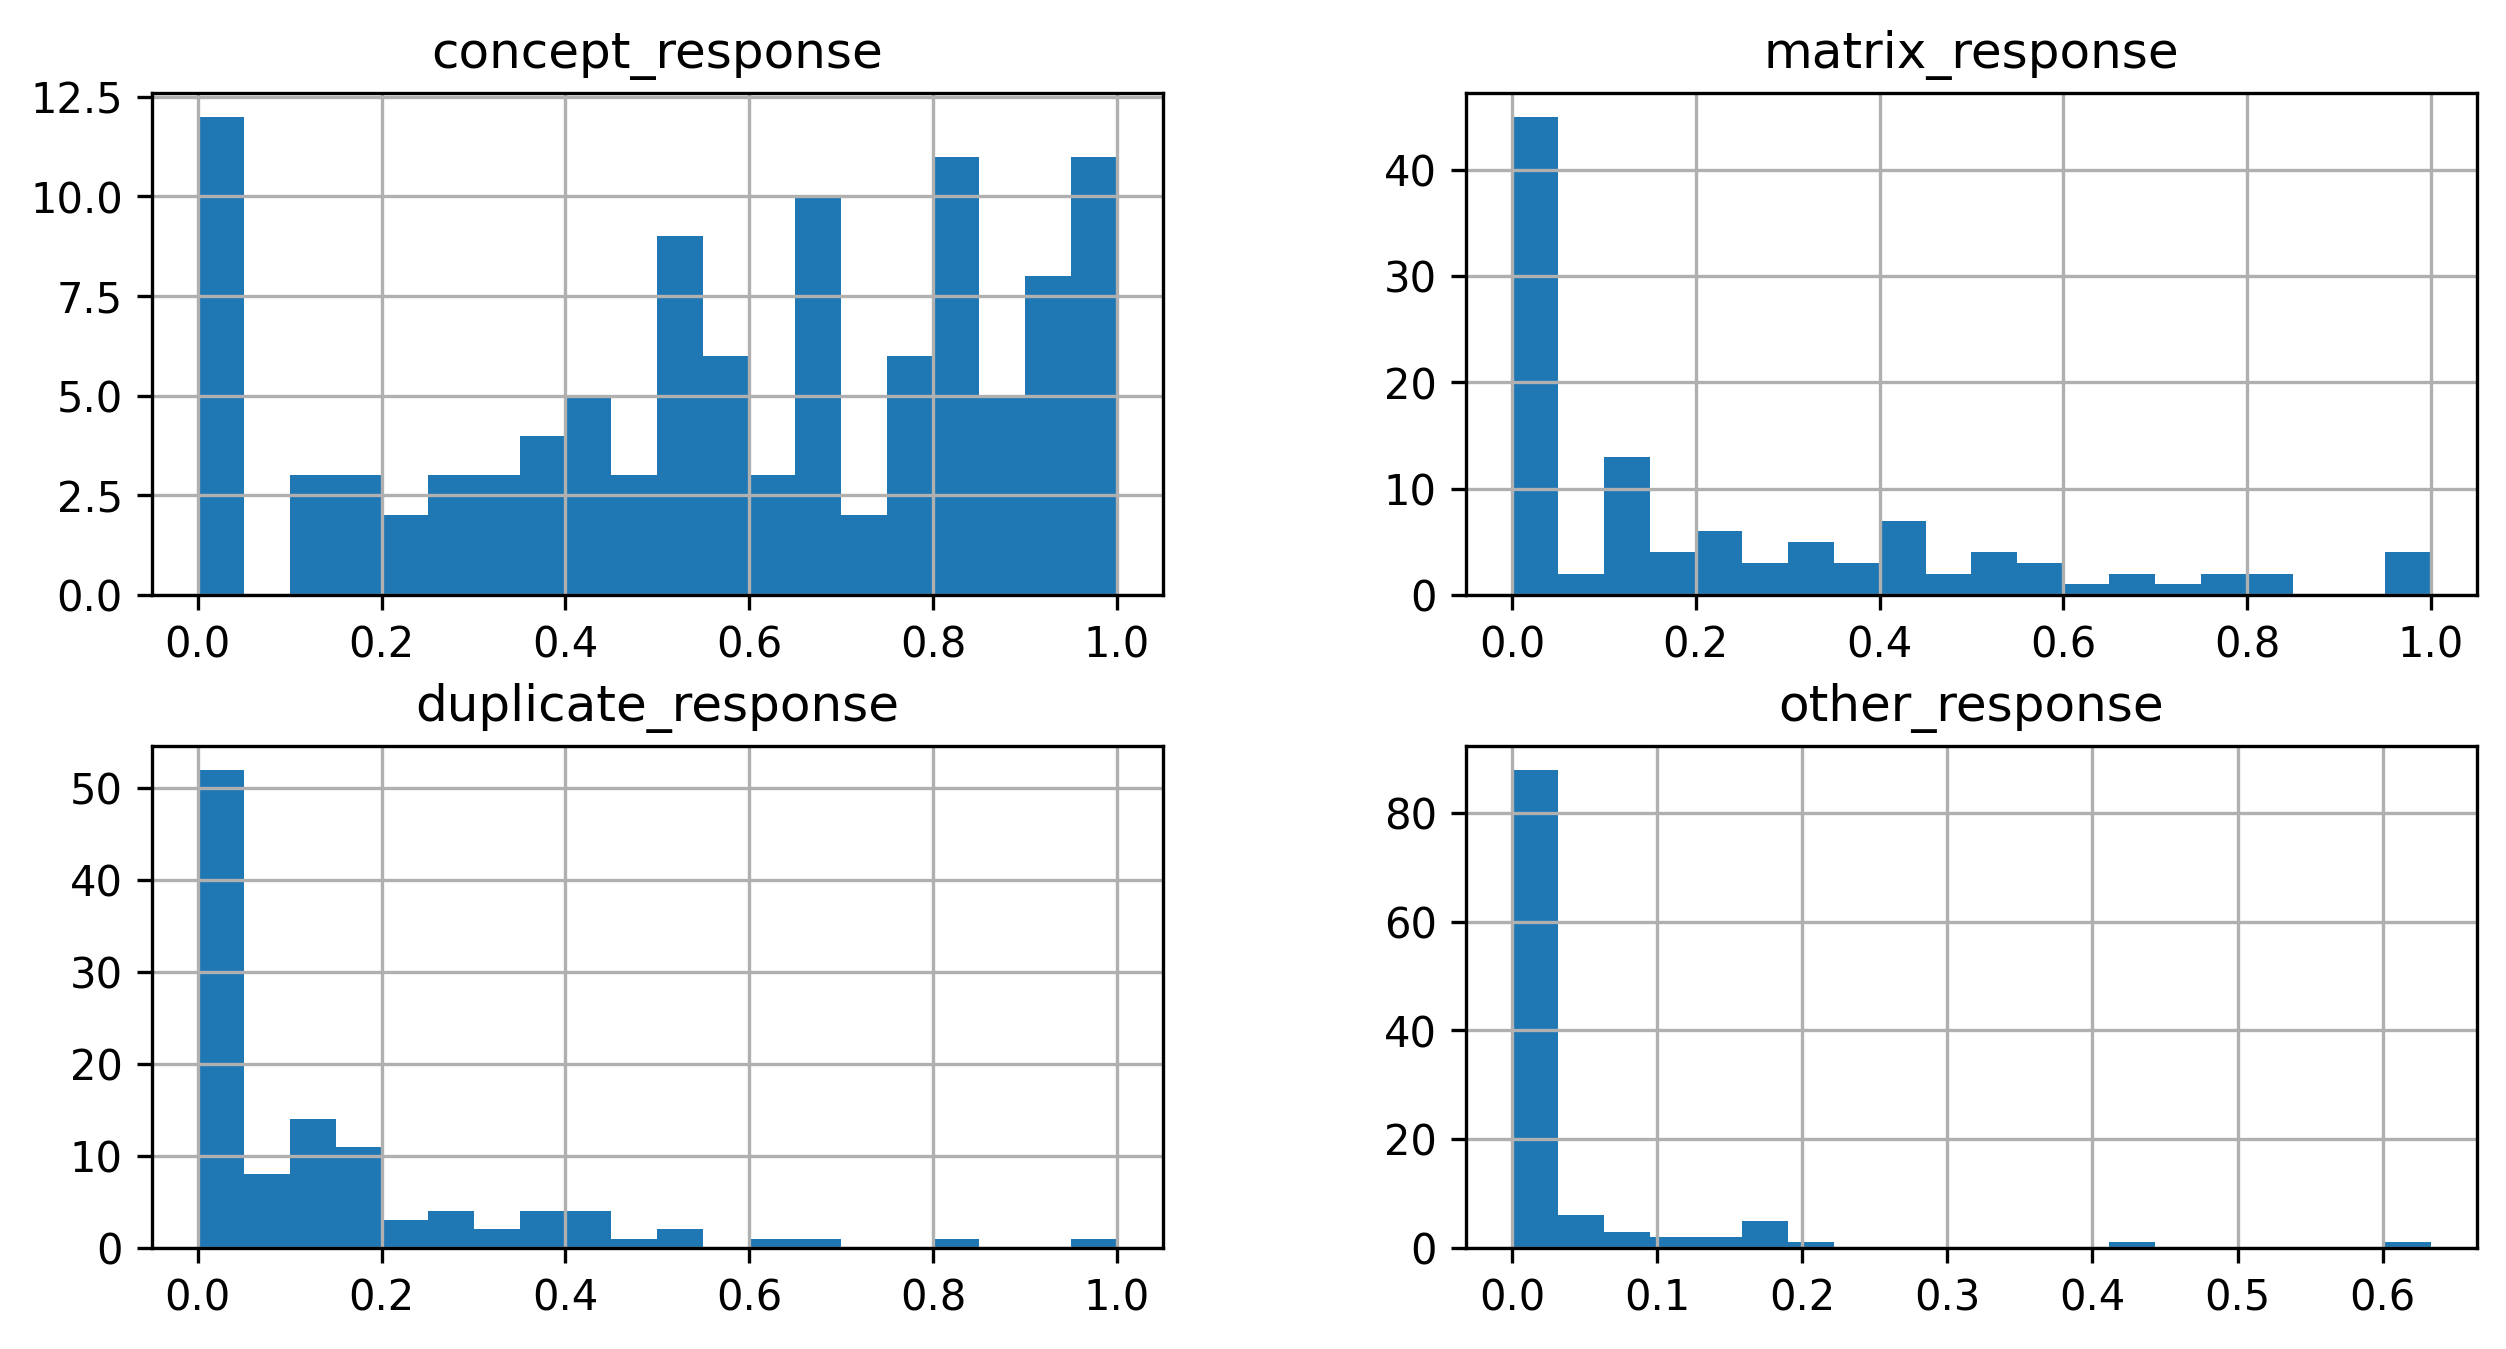

In [9]:
item_df[response_cols].hist(bins=20, figsize=(10, 5))

<Axes: xlabel='concept'>

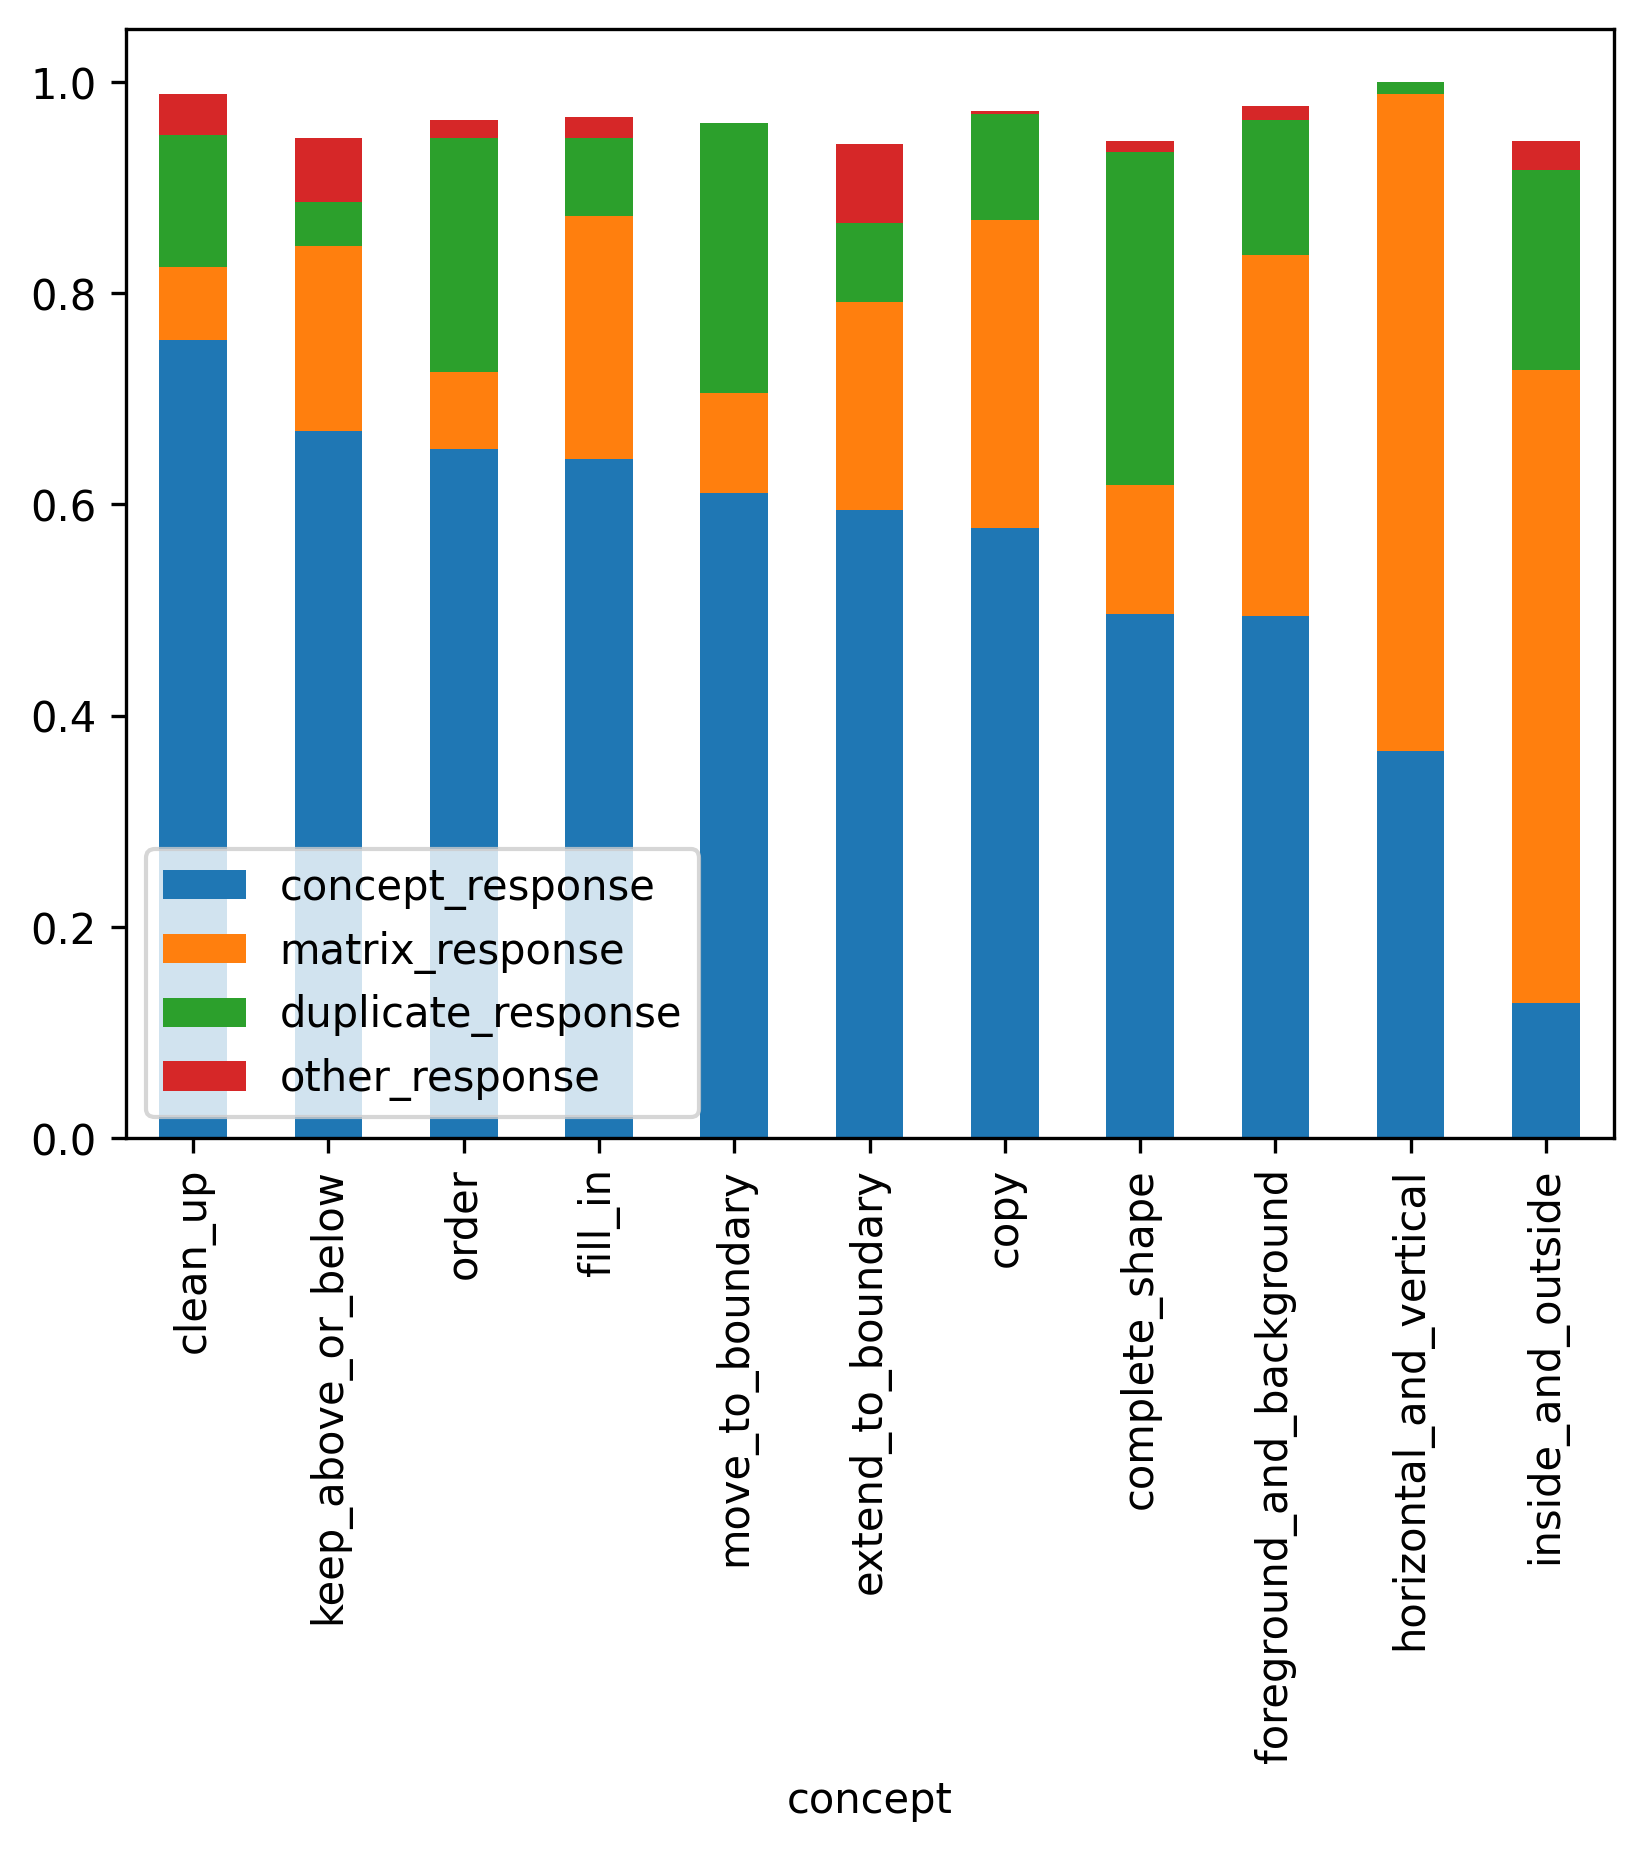

In [10]:
discrimination.df.groupby('concept')[response_cols].mean().sort_values('concept_response', ascending=False).plot(kind='bar', stacked=True)

In [43]:
def plot_most_common(item_df, choice, top=3):
    df = item_df.sort_values(by=f'{choice}_response', ascending=False)[:top]
    print(df)
    for i in range(top):      
        discrimination.dataset.plot(df.index[i], f'Item: {df.index[i]} {choice}: {df.iloc[i][f'{choice}_response'] * 100:.2f}%')

              concept_response  matrix_response  duplicate_response  \
item_main_id                                                          
5IChb8                     0.0         0.000000            1.000000   
rKYhVr                     0.0         0.000000            0.833333   
GjqiSH                     0.0         0.166667            0.666667   

              other_response  
item_main_id                  
5IChb8                   0.0  
rKYhVr                   0.0  
GjqiSH                   0.0  


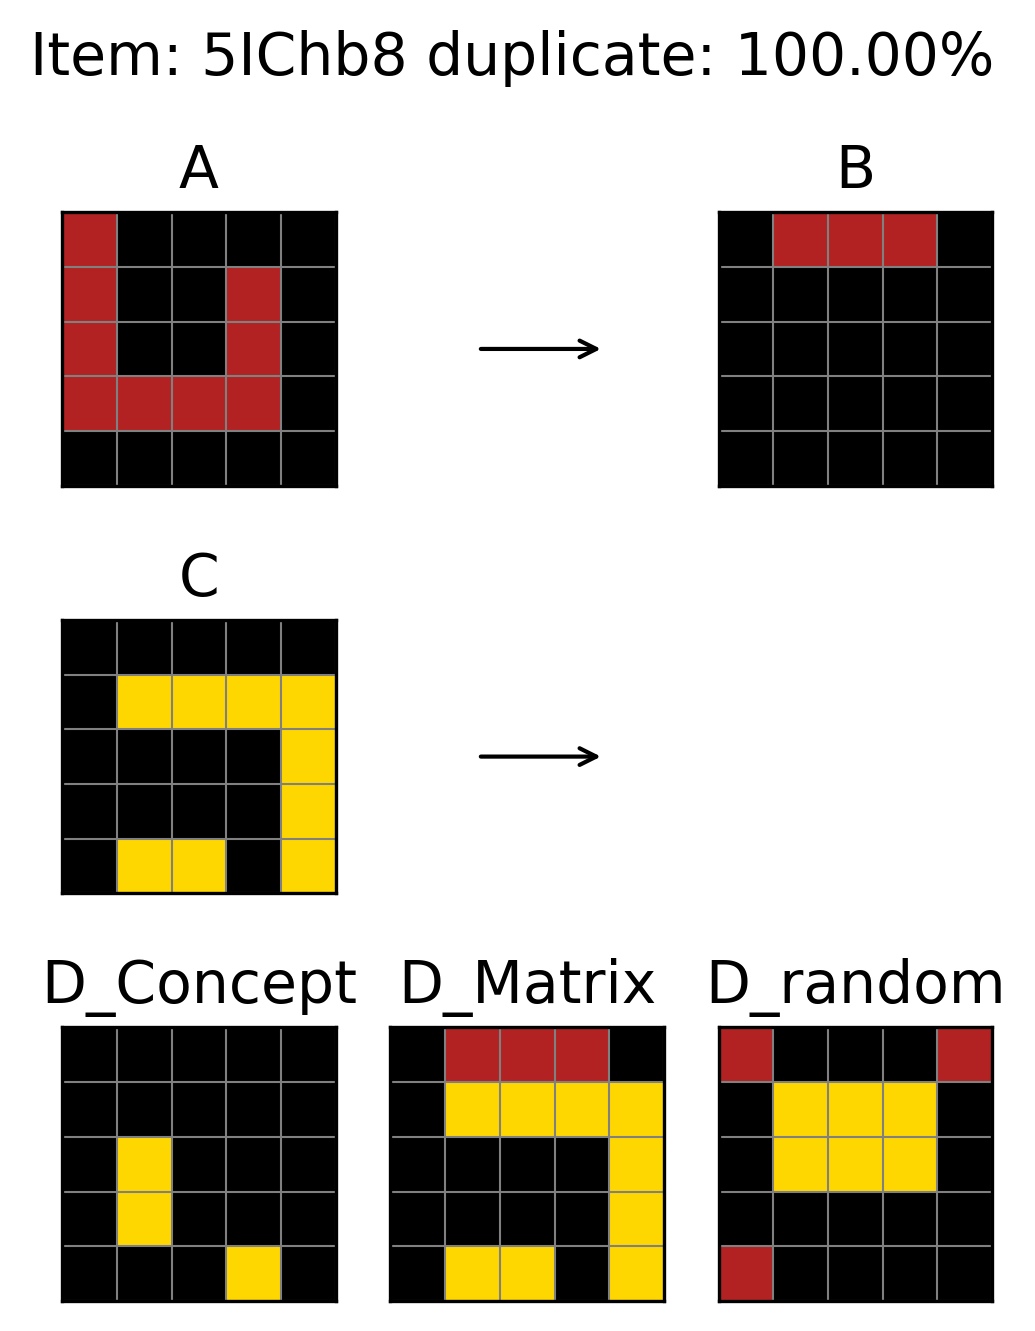

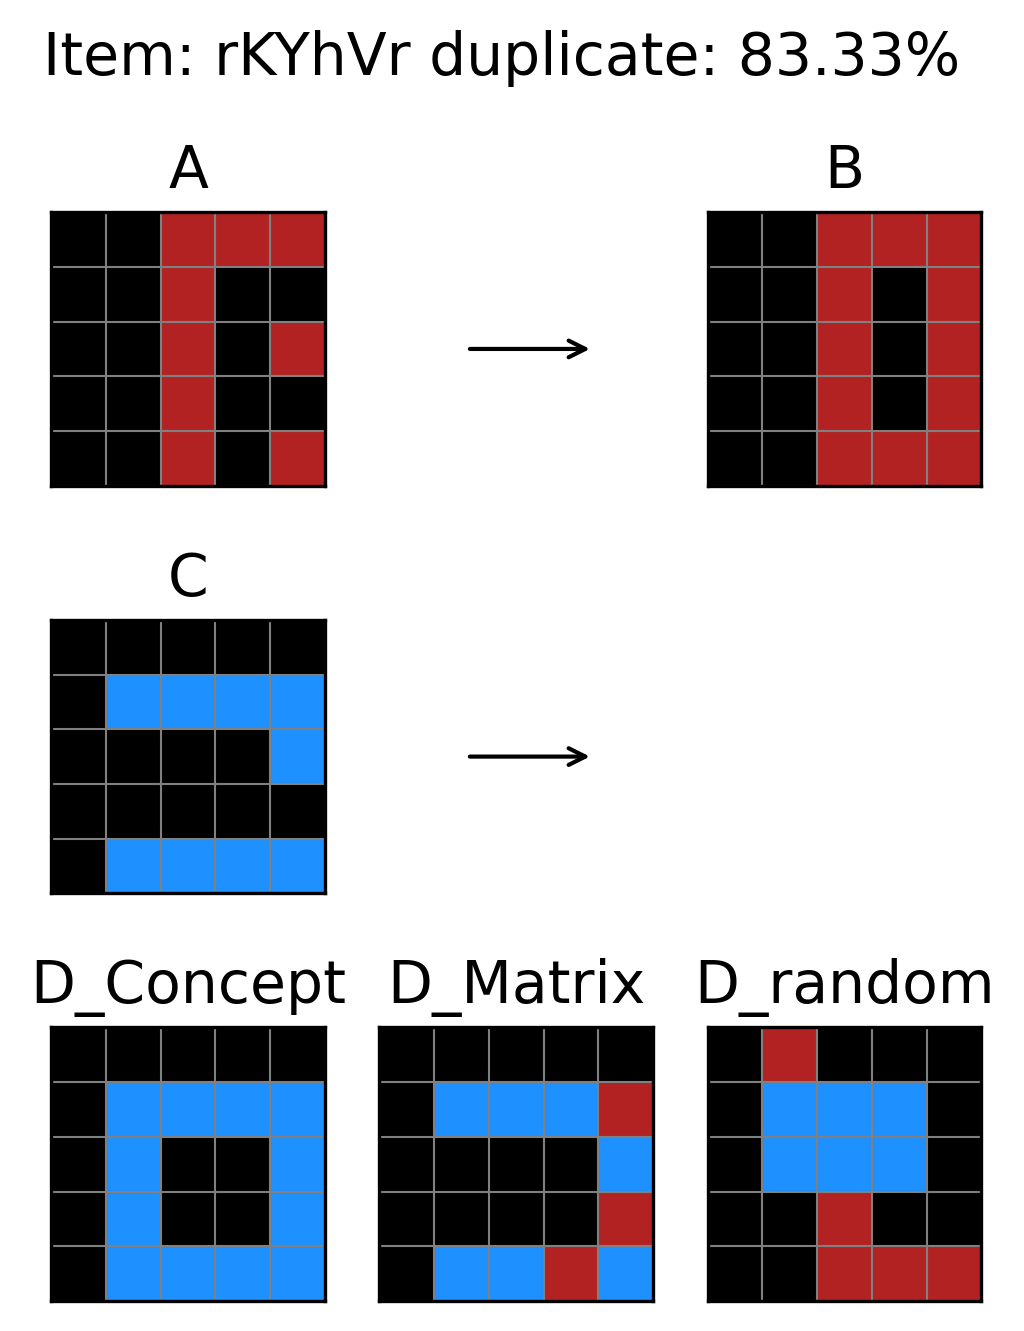

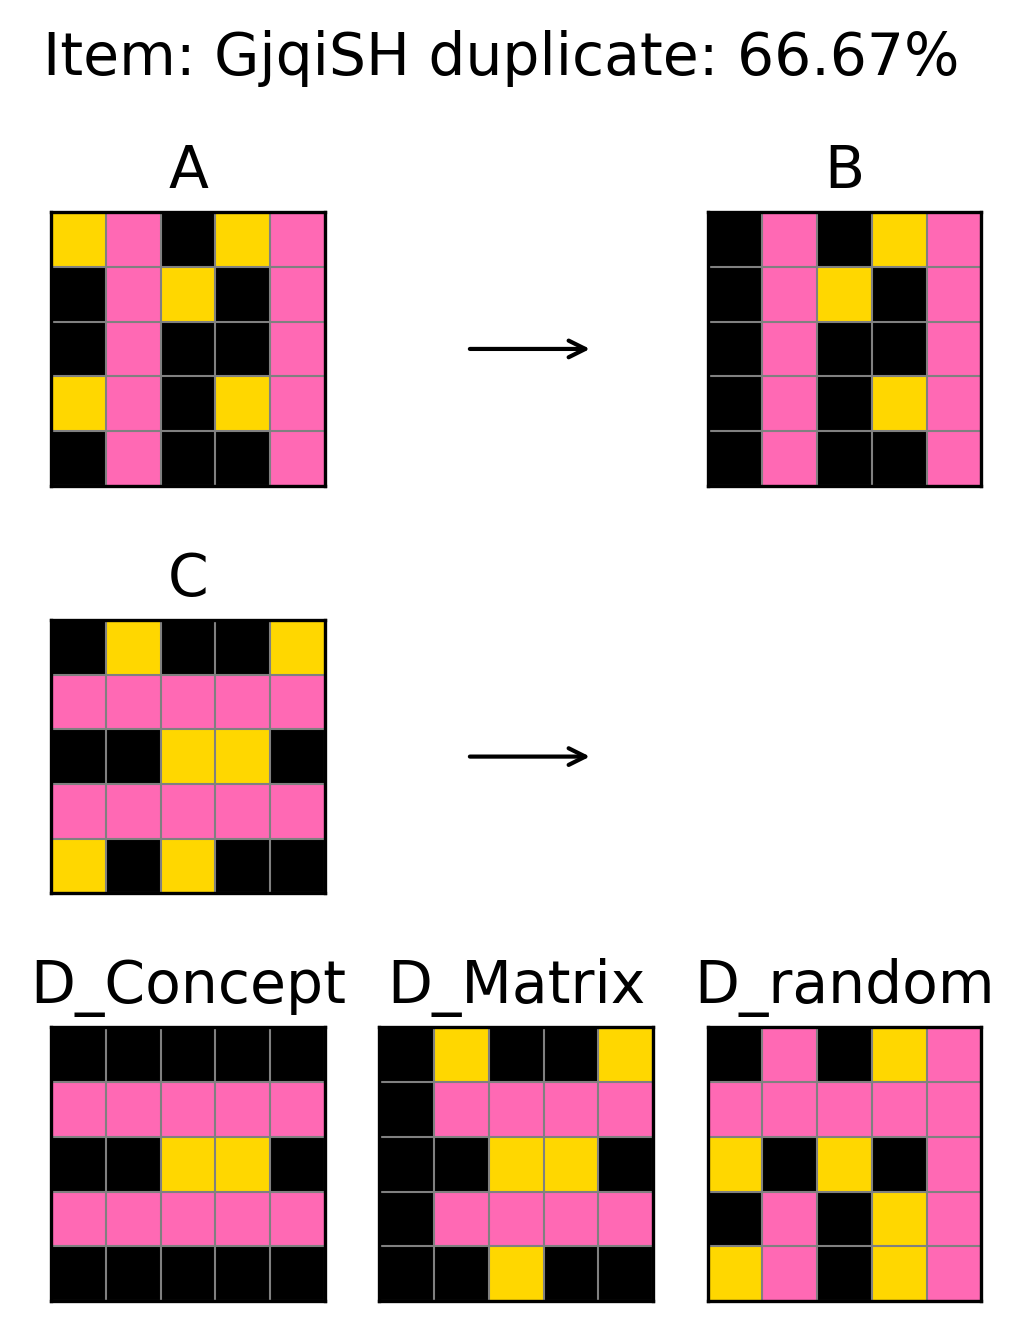

In [46]:
plot_most_common(item_df, 'duplicate', top=3)

# Concept recognition

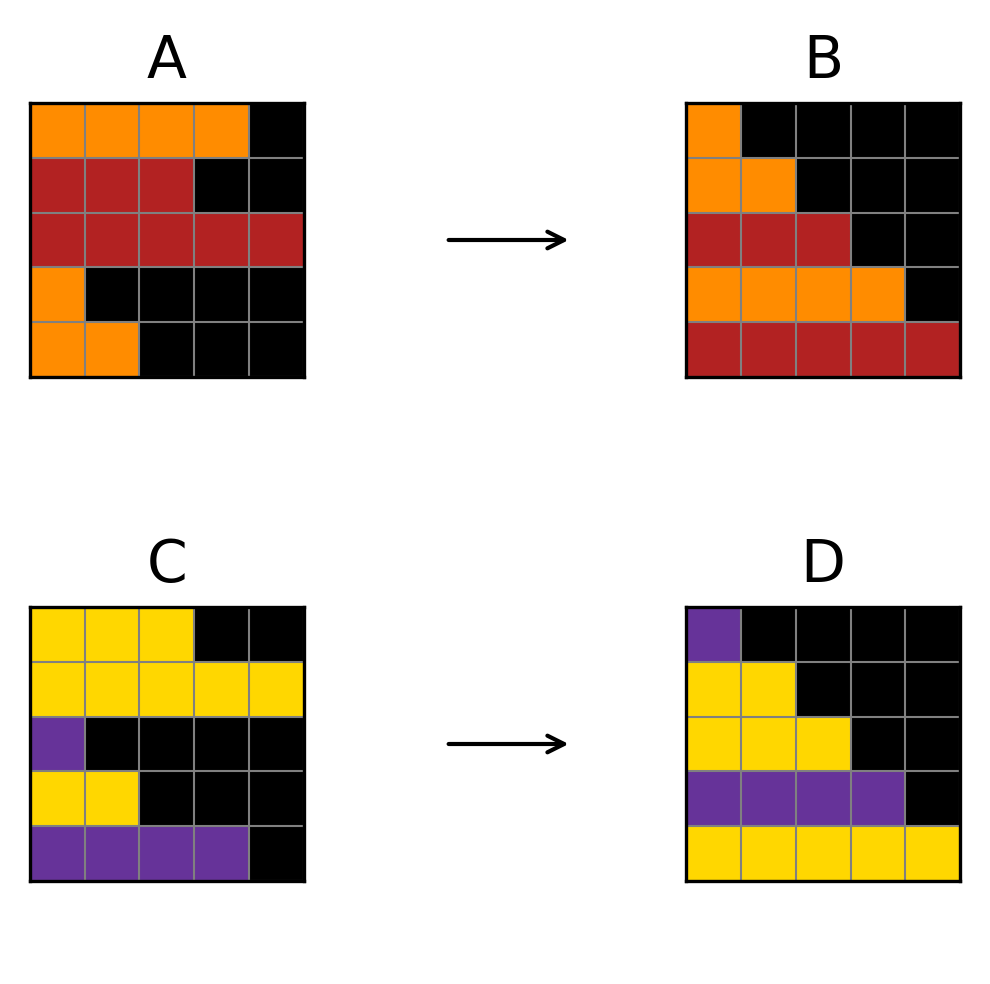

In [49]:
recognition.dataset.plot(0)

In [50]:
recognition.df

,item_main_id,item_id,model,response,concept,concept_response,other_response,logprobs
0,02ue5B,02ue5B_1,Qwen/Qwen1.5-72B-Chat,c,order,0,1,0.634553
1,02ue5B,02ue5B_2,Qwen/Qwen1.5-72B-Chat,c,order,0,1,0.556312
2,02ue5B,02ue5B_3,Qwen/Qwen1.5-72B-Chat,c,order,0,1,0.437294
3,02ue5B,02ue5B_4,Qwen/Qwen1.5-72B-Chat,c,order,0,1,0.468462
4,02ue5B,02ue5B_5,Qwen/Qwen1.5-72B-Chat,c,order,0,1,0.505046
...,...,...,...,...,...,...,...,...
3265,zYuq0D,zYuq0D_1,google/gemma-2-27b-it,d,keep_above_or_below,1,0,0.977431
3266,zYuq0D,zYuq0D_2,google/gemma-2-27b-it,d,keep_above_or_below,1,0,0.97612
3267,zYuq0D,zYuq0D_3,google/gemma-2-27b-it,d,keep_above_or_below,1,0,0.964041
3268,zYuq0D,zYuq0D_4,google/gemma-2-27b-it,d,keep_above_or_below,1,0,0.967578


In [55]:
recognition.df.groupby('model')['concept_response'].mean().sort_values(ascending=False)

model
Qwen/Qwen1.5-110B-Chat                           0.398165
Qwen/Qwen1.5-72B-Chat                            0.365138
google/gemma-2-27b-it                            0.377982
google/gemma-2-9b-it                             0.354128
meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo    0.475229
meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo     0.416514
Name: concept_response, dtype: float64

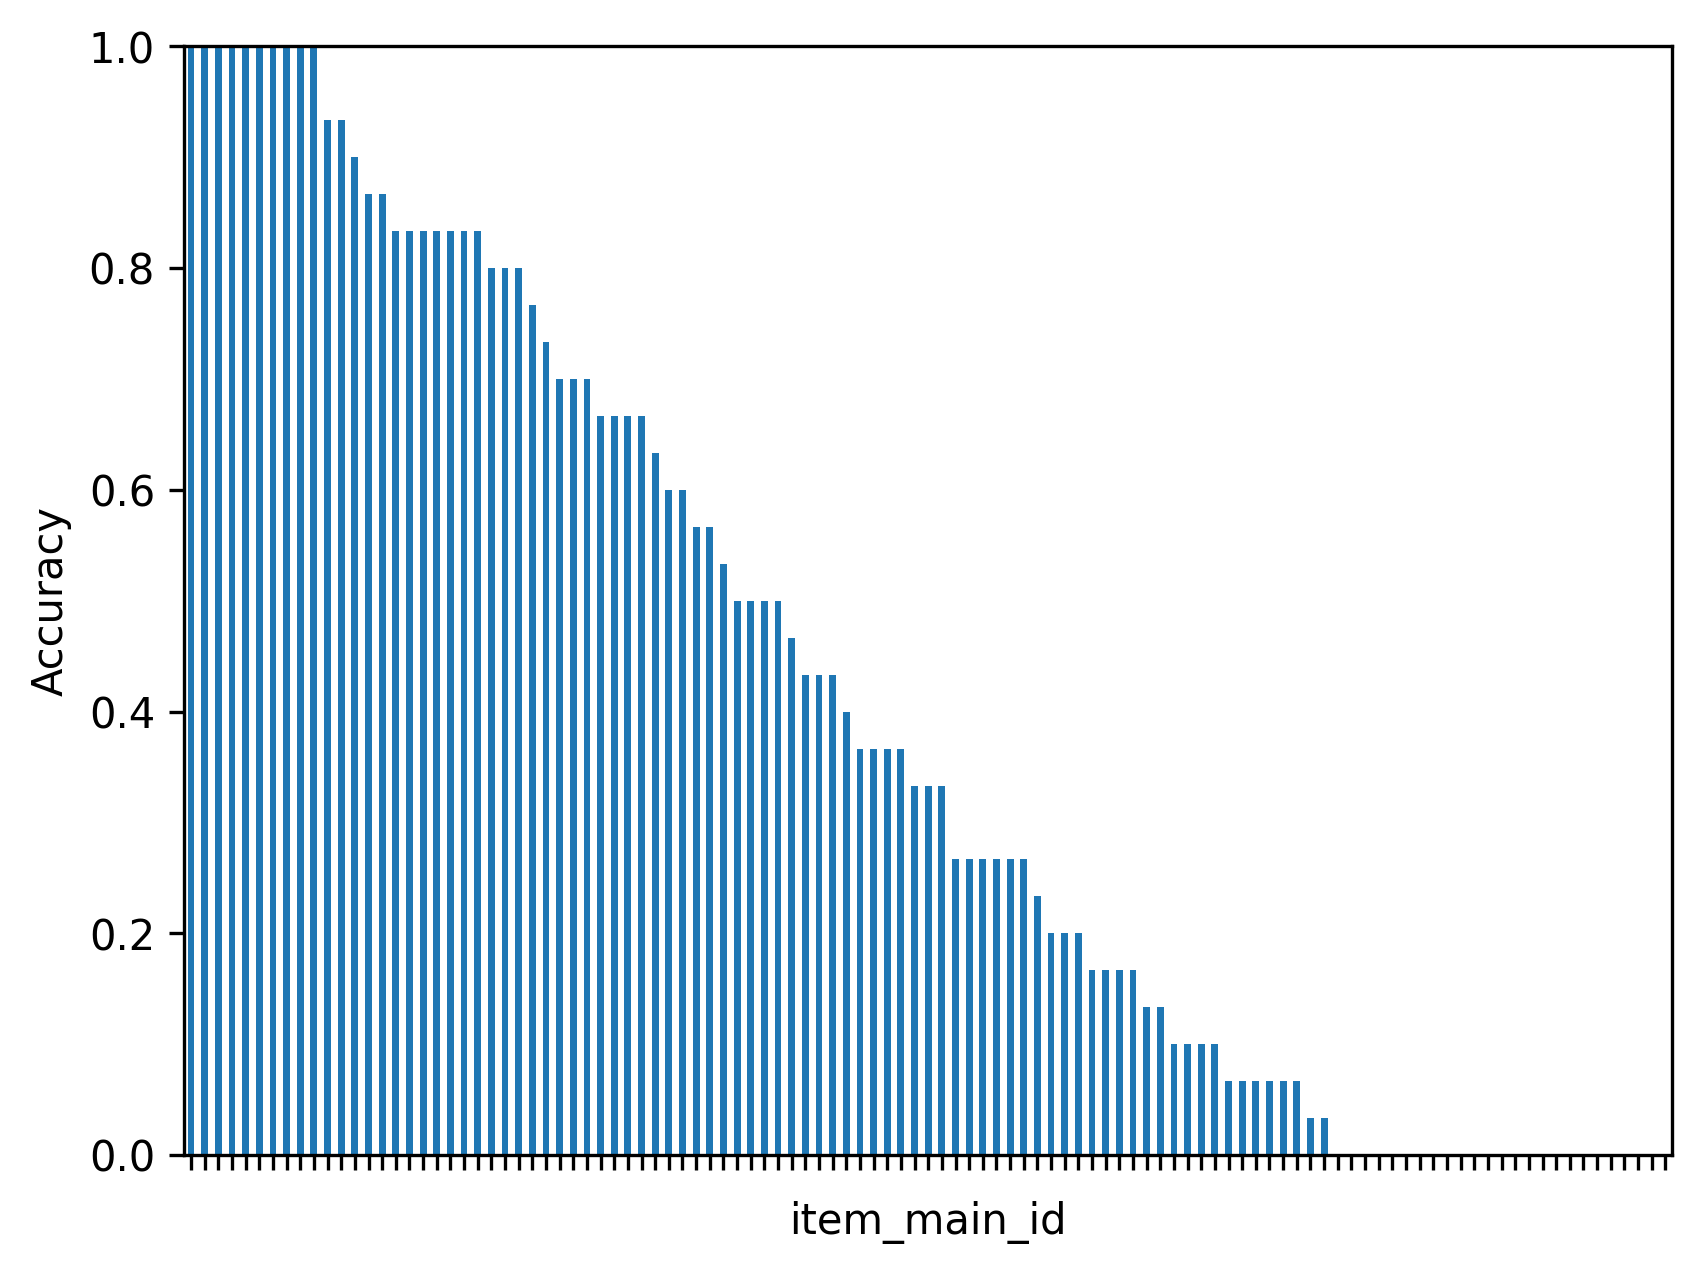

In [58]:
recognition.df.groupby('item_main_id')['concept_response'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Accuracy')
plt.xticks(ticks=plt.gca().get_xticks(), labels=[])
plt.ylim(0, 1)
plt.show()

/var/folders/9l/dl632xqj3d57xyzhdlhfn4x80000gn/T/ipykernel_68563/2394485166.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abcd.dataset.plot(df.index[i], f'Concept: {concept} Acc: {df[i] * 100:.2f}%')


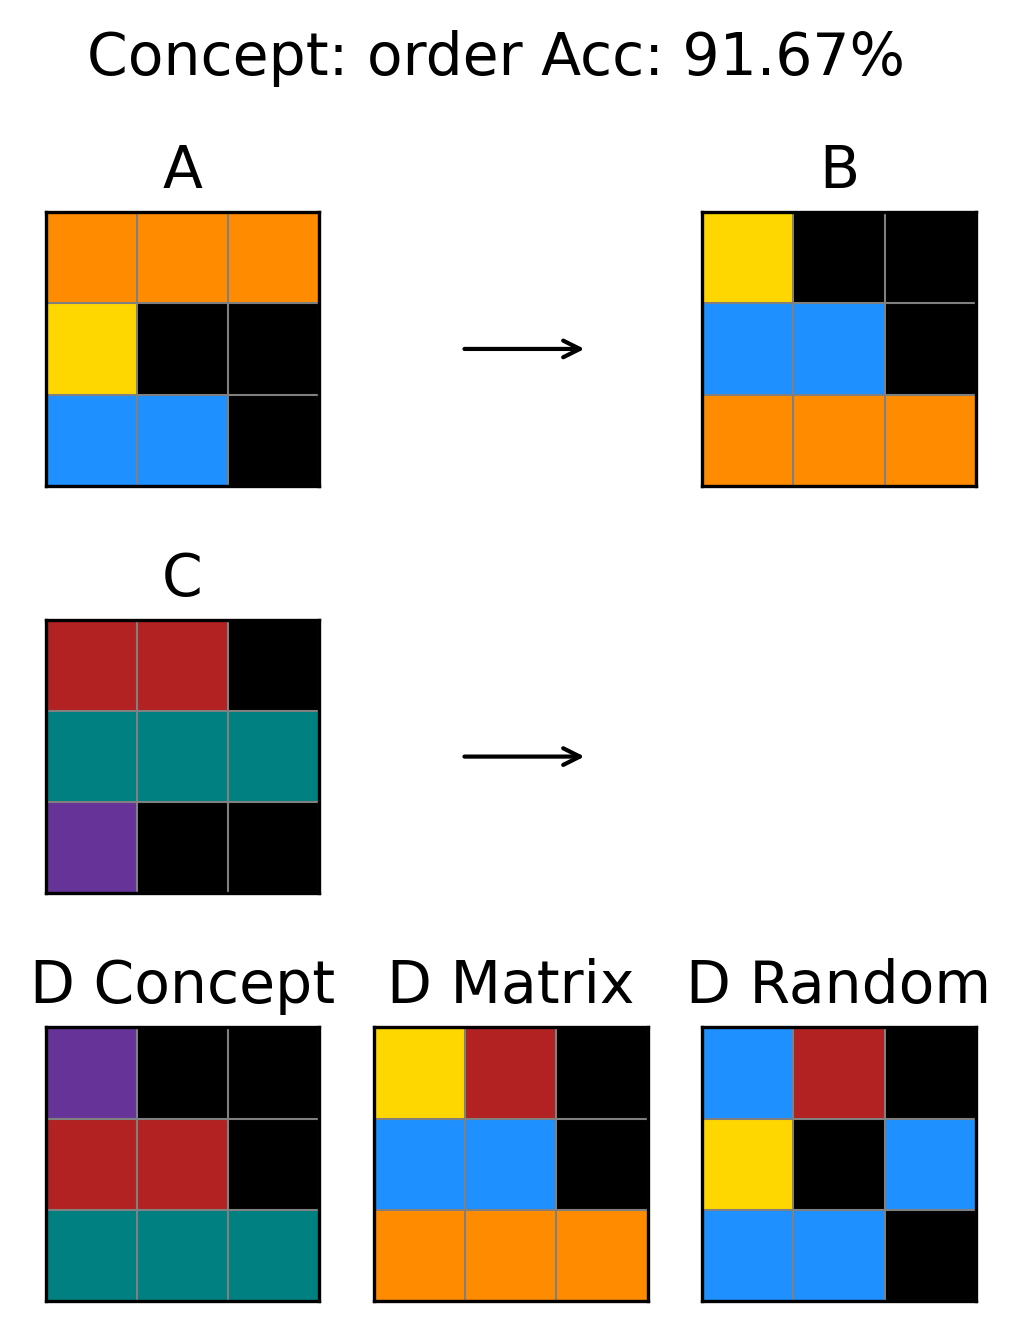

/var/folders/9l/dl632xqj3d57xyzhdlhfn4x80000gn/T/ipykernel_68563/2394485166.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abcd.dataset.plot(df.index[i], f'Concept: {concept} Acc: {df[i] * 100:.2f}%')


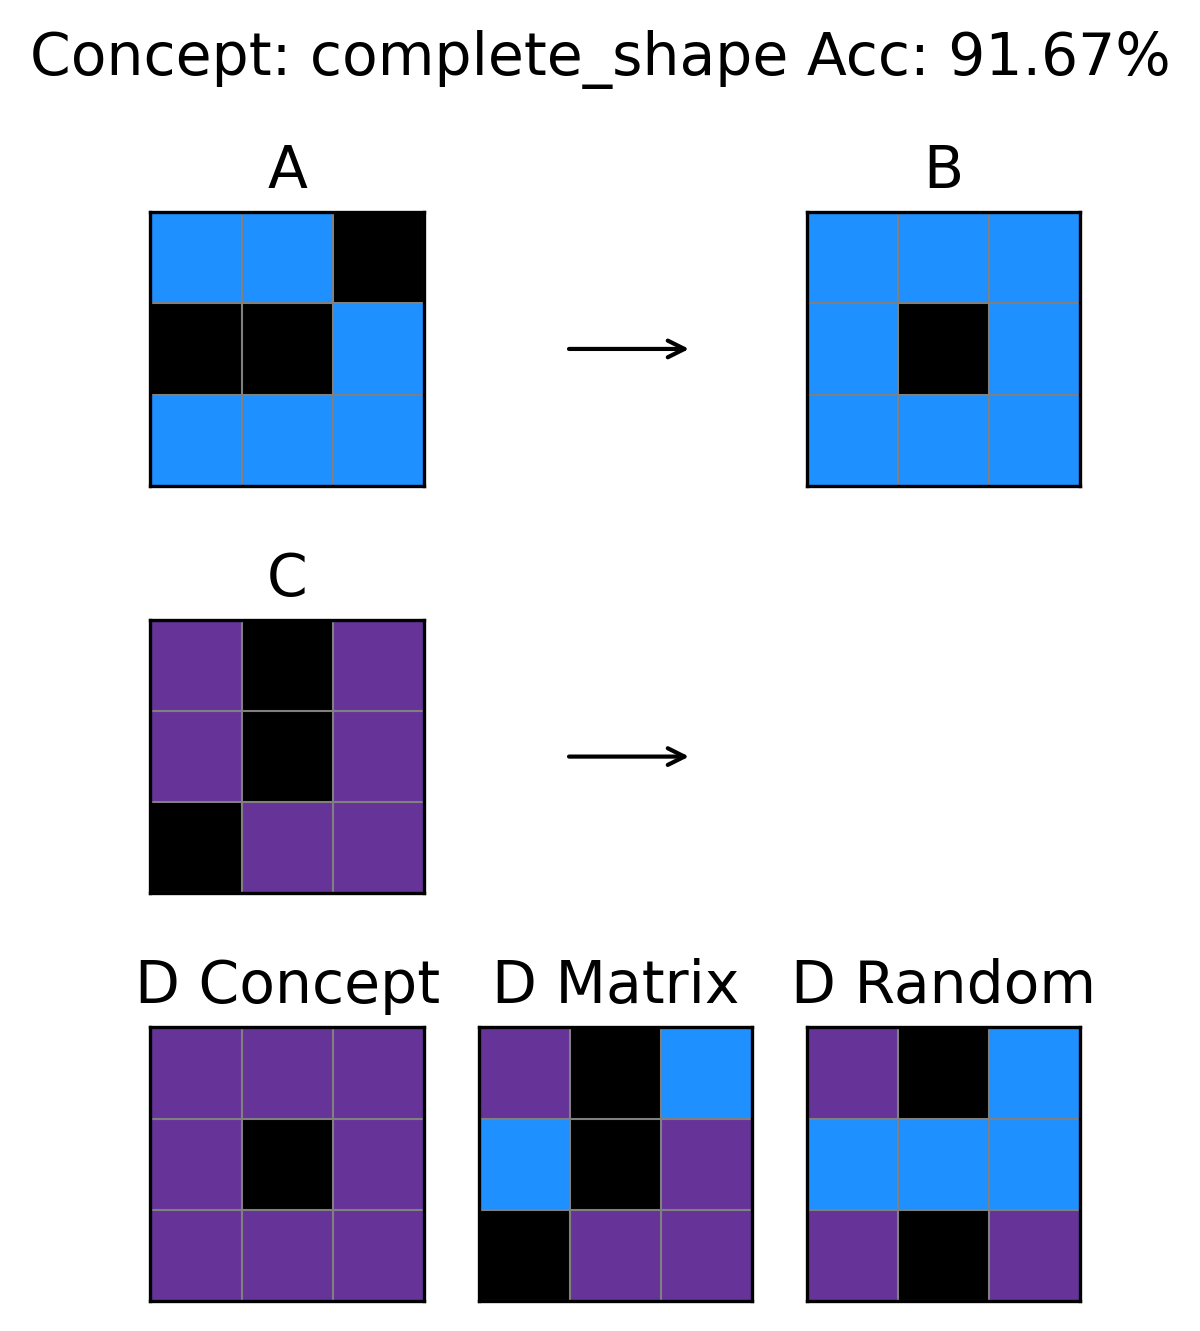

/var/folders/9l/dl632xqj3d57xyzhdlhfn4x80000gn/T/ipykernel_68563/2394485166.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abcd.dataset.plot(df.index[i], f'Concept: {concept} Acc: {df[i] * 100:.2f}%')


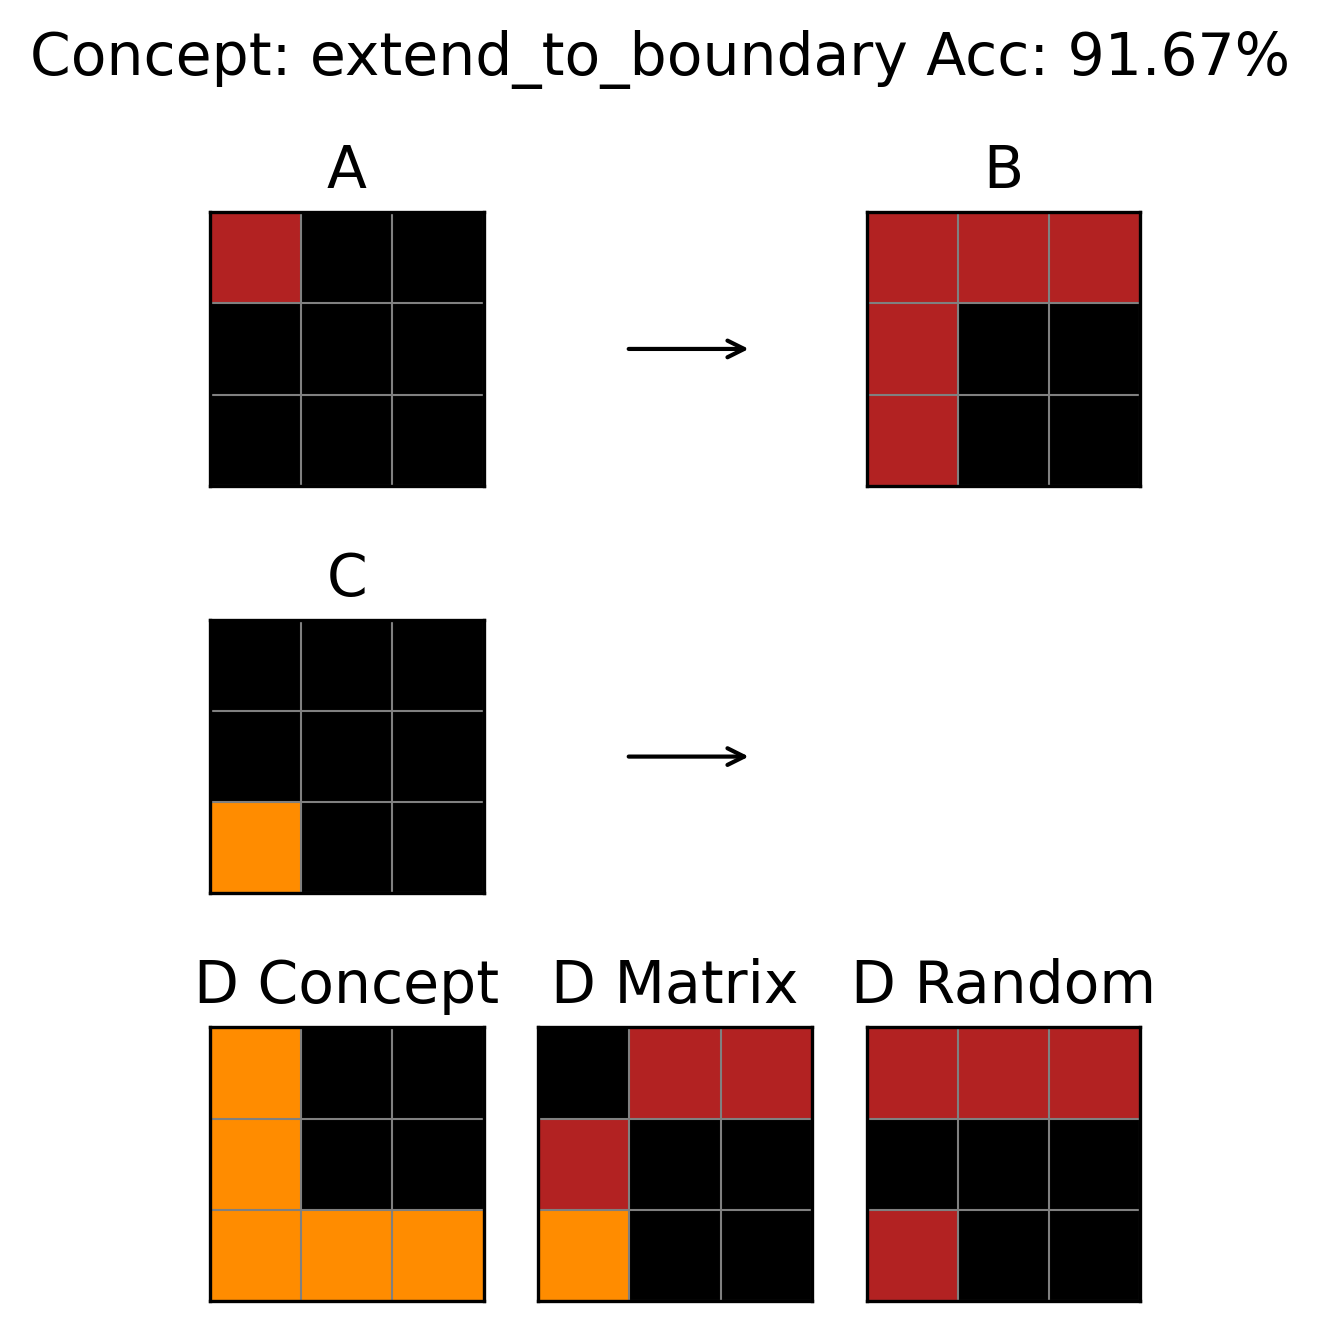

In [130]:
def plot_most_common(df, top=3, ascending=False):
    df = df.sort_values(ascending=ascending)[:top]
    for i in range(top):      
        concept = abcd.dataset.items_data[df.index[i]]['concept']
        abcd.dataset.plot(df.index[i], f'Concept: {concept} Acc: {df[i] * 100:.2f}%')

plot_most_common(filtered_df.groupby('item_id')['concept_acc'].mean(), top=3, ascending=False)

<Axes: ylabel='concept'>

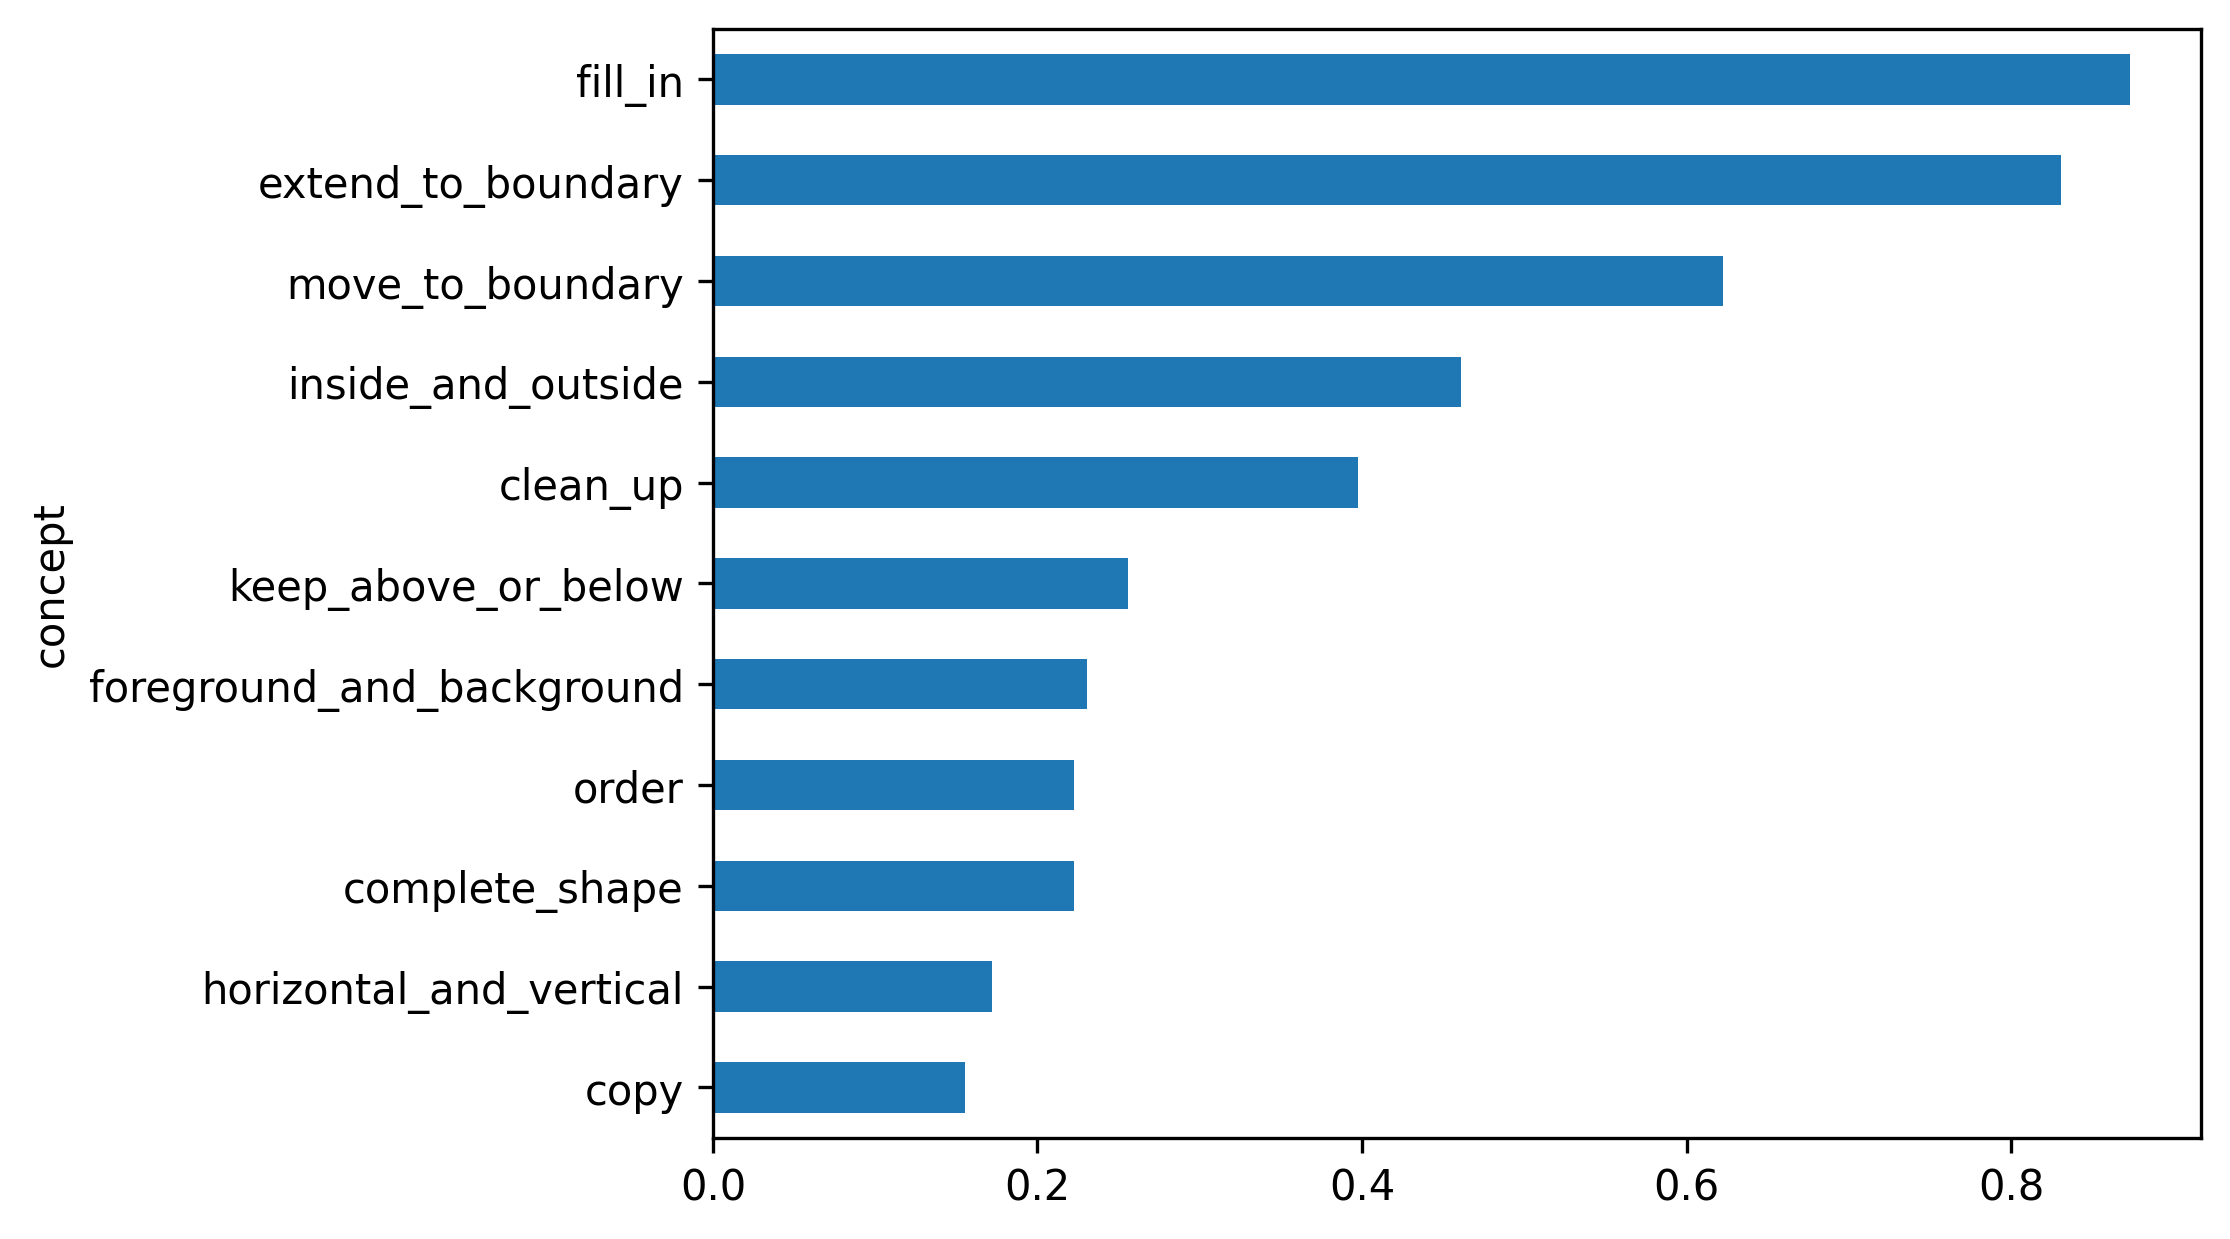

In [60]:
recognition.df.groupby('concept')['concept_response'].mean().sort_values(ascending=True).plot(kind='barh')

In [96]:
response_cols

['concept_response', 'matrix_response', 'duplicate_response', 'other_response']

<Axes: xlabel='model'>

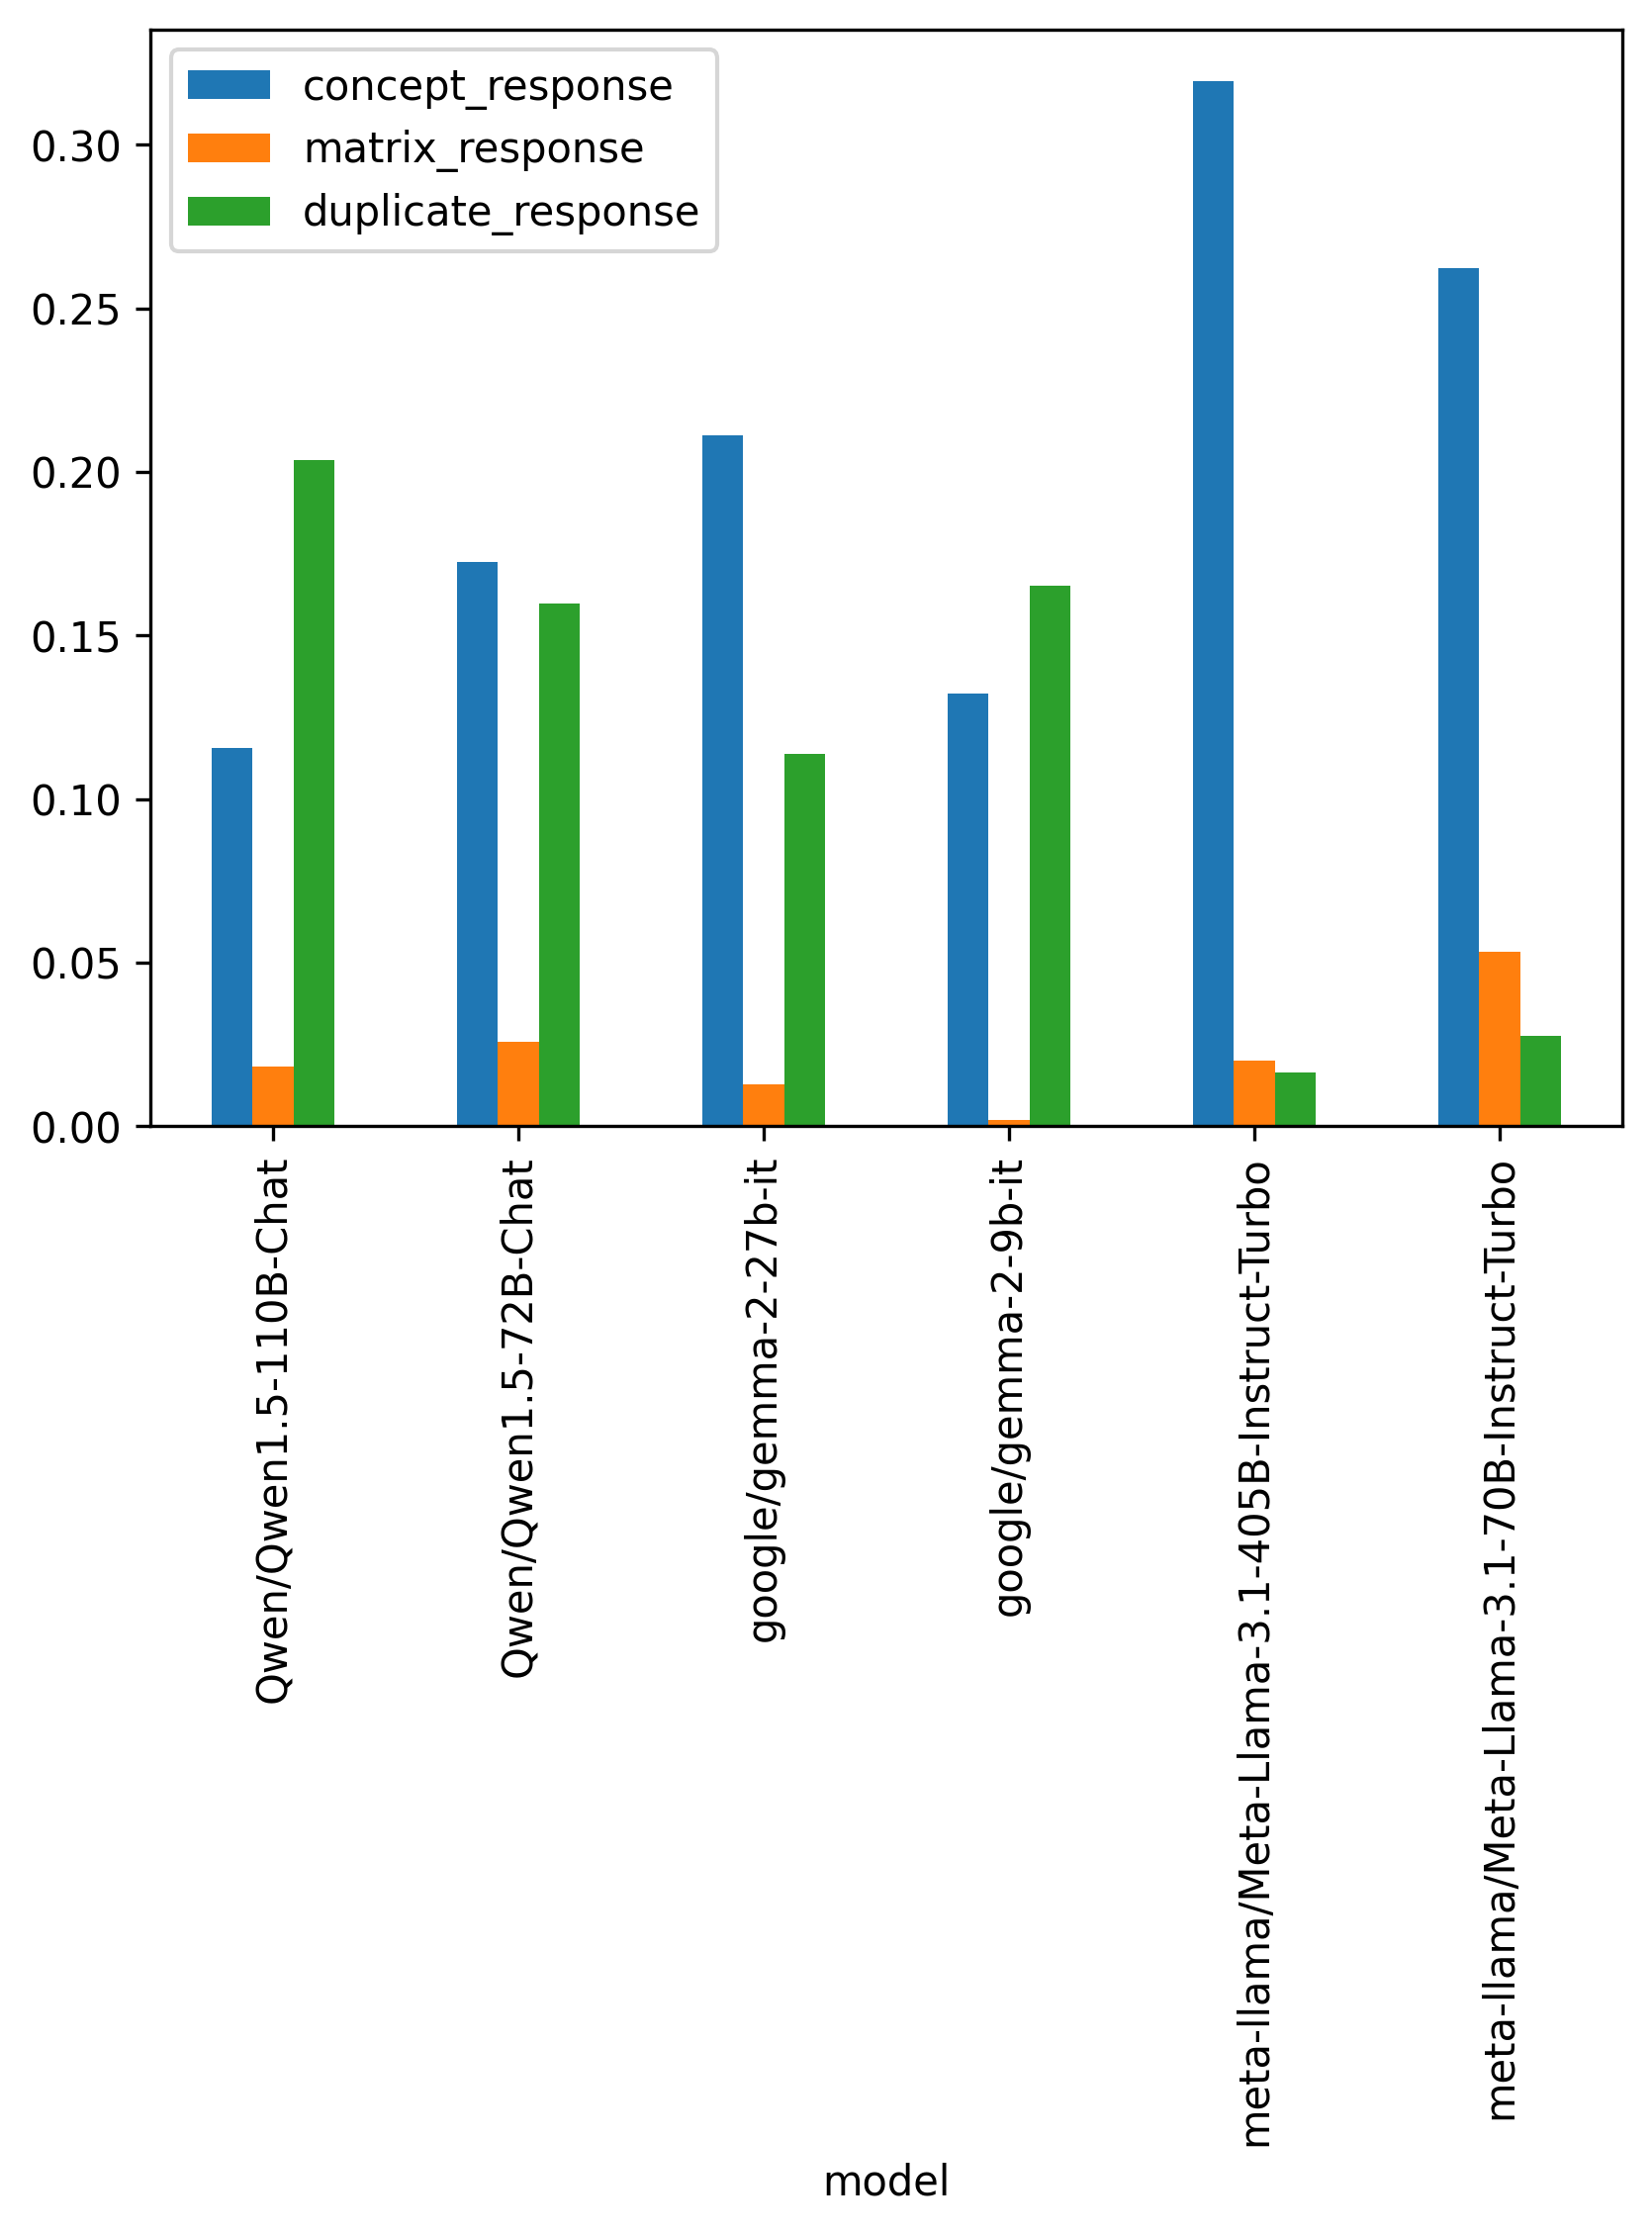

In [15]:
generation.df.groupby('model')[response_cols[:-1]].mean().plot(kind='bar', stacked=False)

In [34]:
print(recognition.dataset.x[0])

EXAMPLE TASK:

Input 1: [0 6 0 0 0] [0 6 0 0 0] [0 6 0 5 5] [0 6 0 5 5] [0 6 0 0 0]
Output 1: [0 6 0 0 0] [0 6 0 0 0] [0 6 5 5 0] [0 6 5 5 0] [0 6 0 0 0]
Input 2: [0 0 6 0 0] [0 0 6 0 5] [0 0 6 0 5] [0 0 6 0 5] [0 0 6 0 0]
Output 2: [0 0 6 0 0] [0 0 6 5 0] [0 0 6 5 0] [0 0 6 5 0] [0 0 6 0 0]

Concept:
(a) Extend to boundary
(b) Copy
(c) Move to boundary
(d) Foreground and background

Answer: (c)

TEST TASK:

Input 1: [2 2 2 2 0] [1 1 1 0 0] [1 1 1 1 1] [2 0 0 0 0] [2 2 0 0 0]
Output 1: [2 0 0 0 0] [2 2 0 0 0] [1 1 1 0 0] [2 2 2 2 0] [1 1 1 1 1]
Input 2: [3 3 3 0 0] [3 3 3 3 3] [6 0 0 0 0] [3 3 0 0 0] [6 6 6 6 0]
Output 2: [6 0 0 0 0] [3 3 0 0 0] [3 3 3 0 0] [6 6 6 6 0] [3 3 3 3 3]

Concept:
(a) Keep above or below
(b) Horizontal and vertical
(c) Complete shape
(d) Order

Answer: (


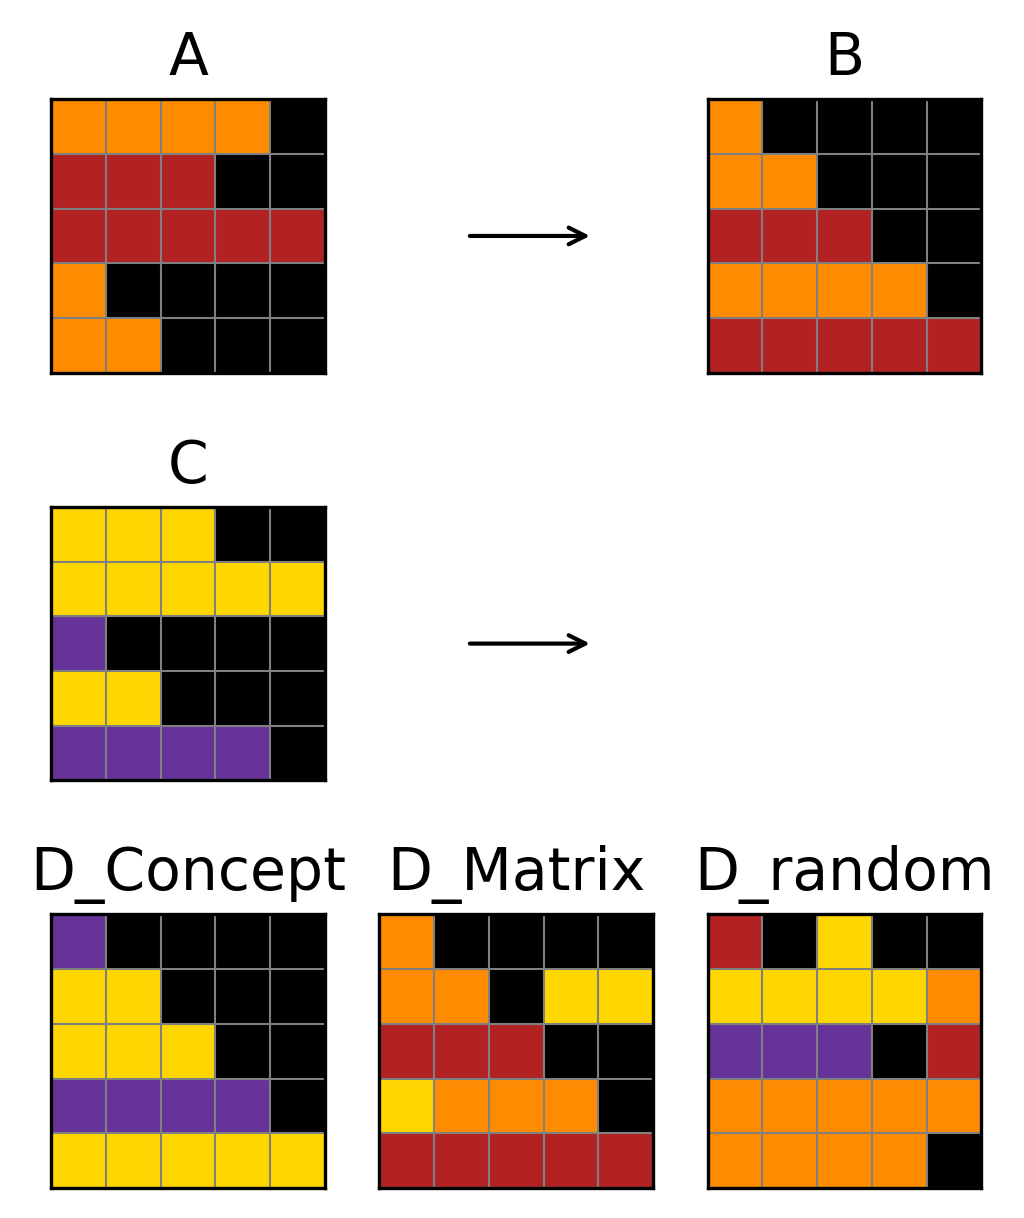

In [32]:
discrimination.dataset.plot(0)

# Open-ended

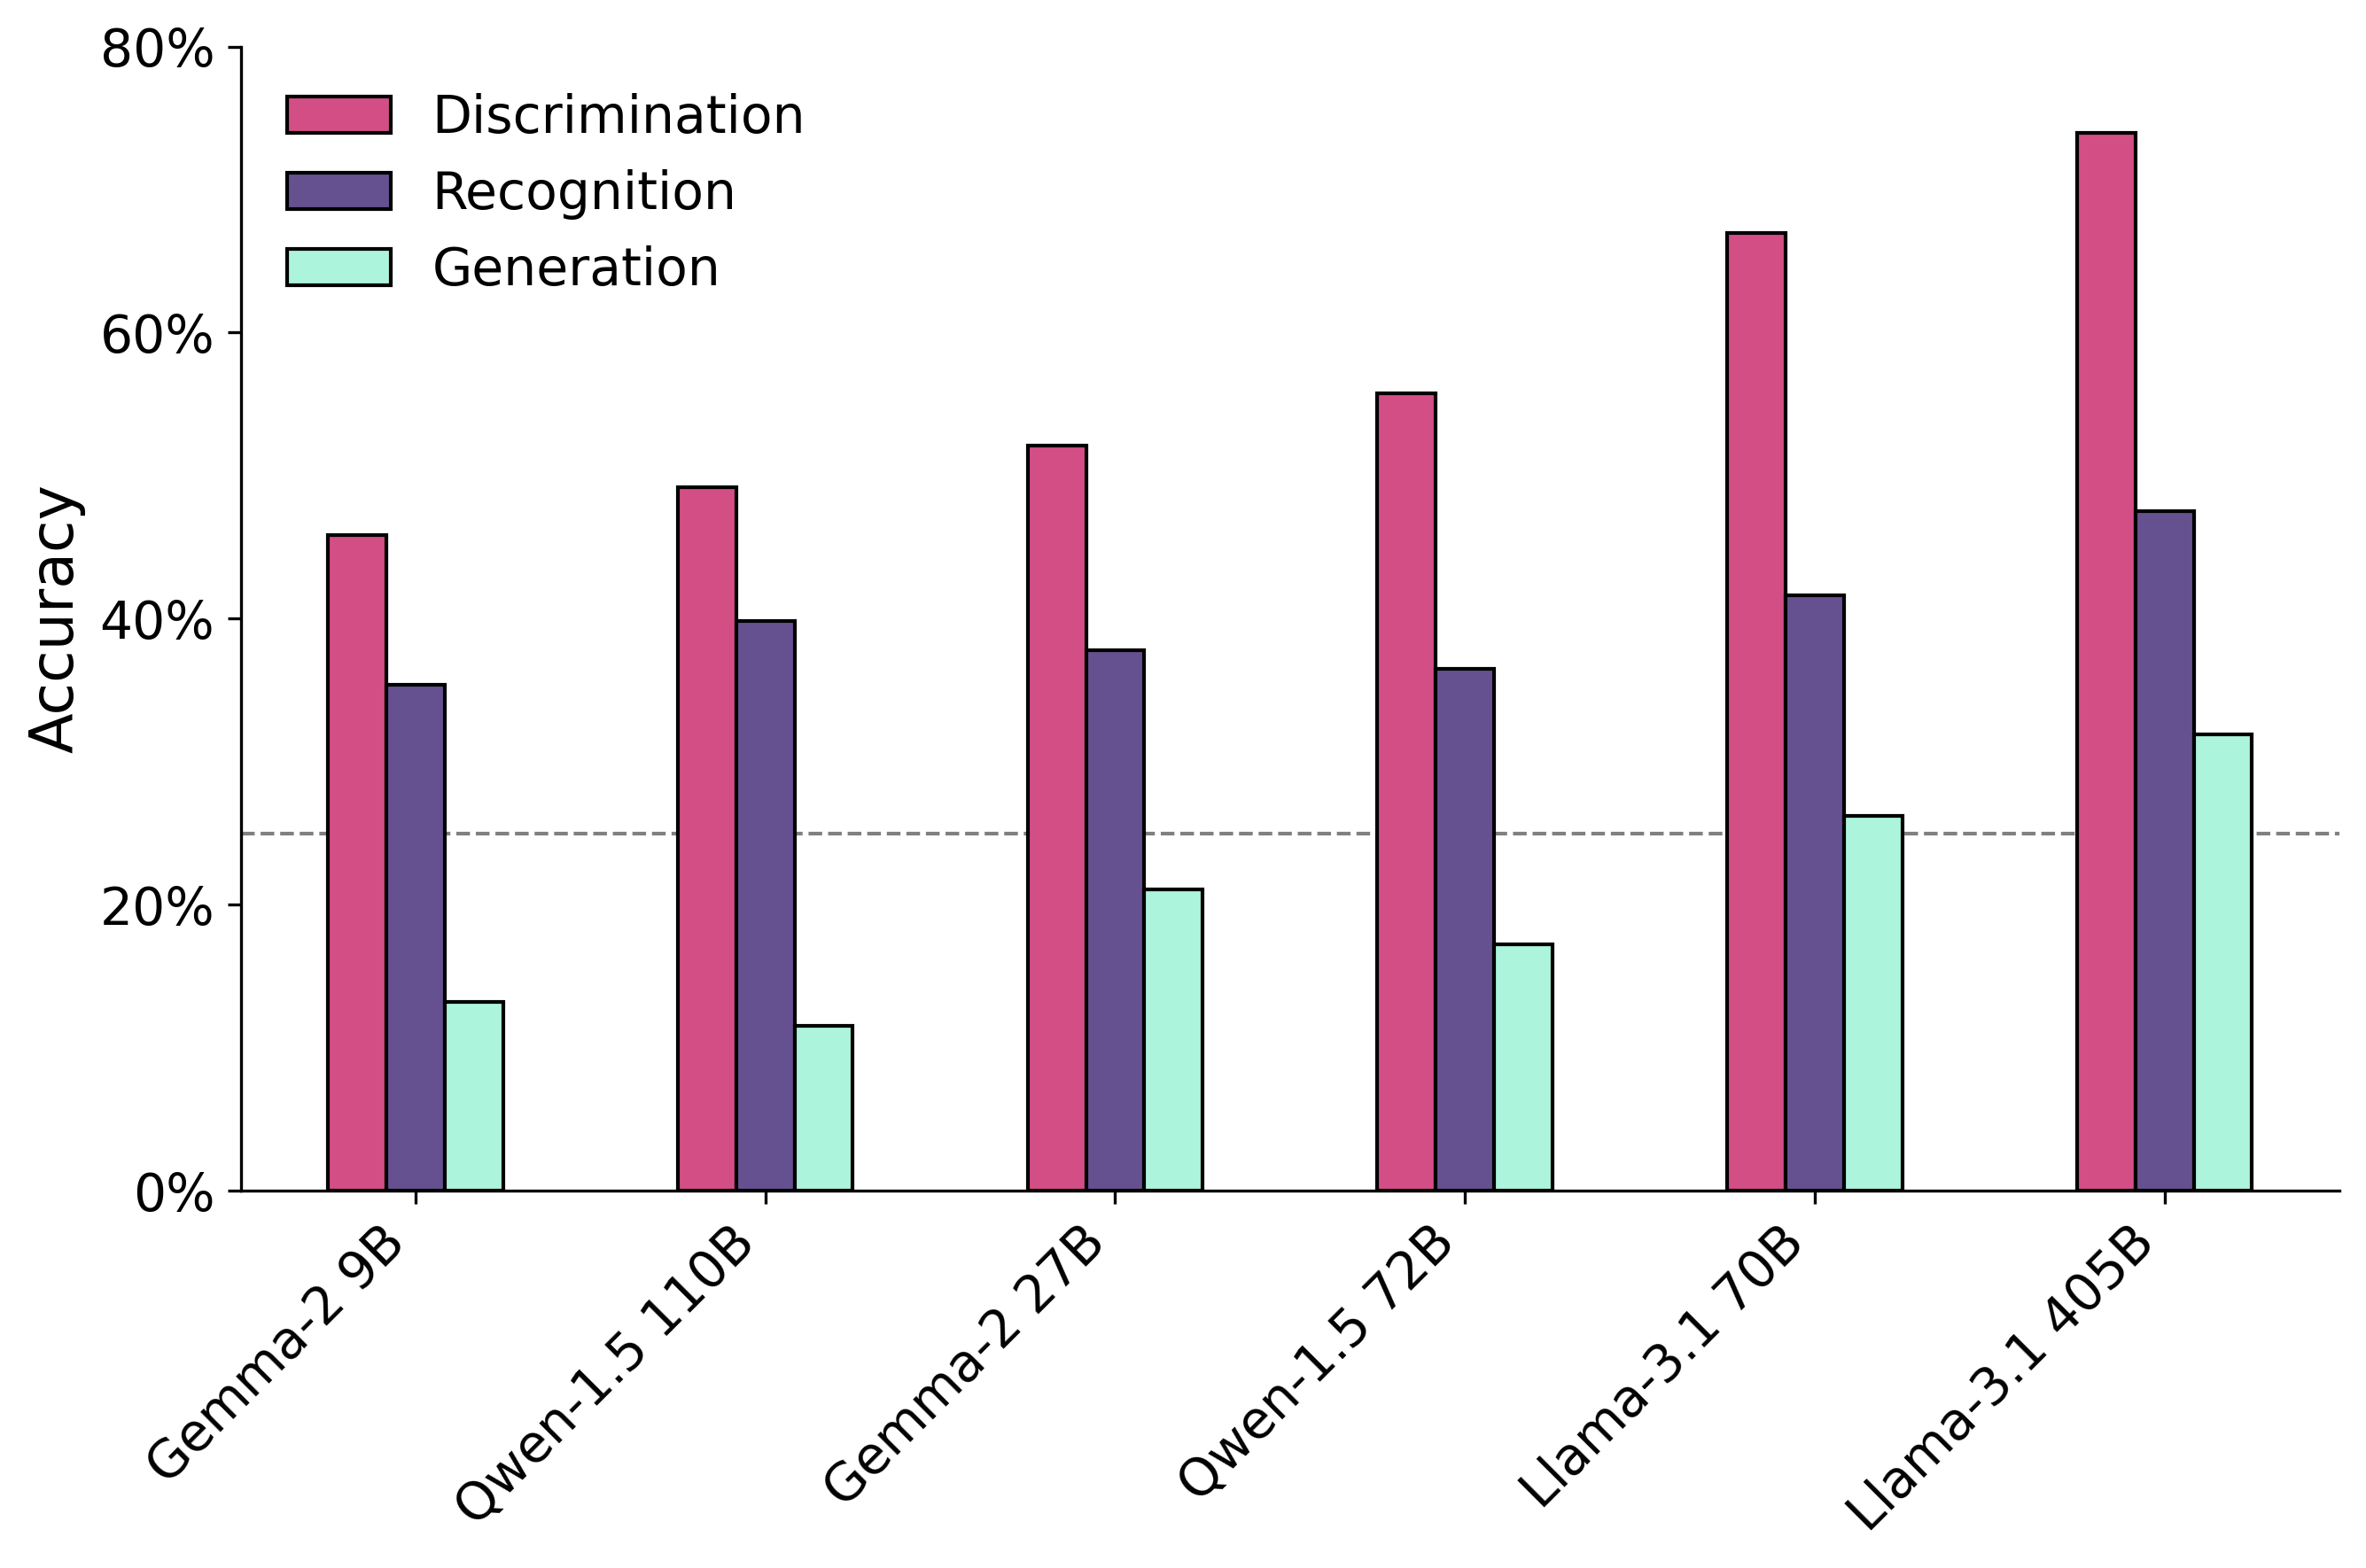

In [41]:
names = {
    'google/gemma-2-9b-it': 'Gemma-2 9B',
    'google/gemma-2-27b-it': 'Gemma-2 27B',
    'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo': 'Llama-3.1 405B',
    'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo': 'Llama-3.1 70B',
    'Qwen/Qwen1.5-72B-Chat': 'Qwen-1.5 72B',
    'Qwen/Qwen1.5-110B-Chat': 'Qwen-1.5 110B',
}

# DataFrame creation
df = pd.DataFrame({
    'Discrimination': discrimination.df.groupby('model')['concept_response'].mean(),
    'Recognition': recognition.df.groupby('model')['concept_response'].mean(),
    'Generation': generation.df.groupby('model')['concept_response'].mean(),
})

# Sort the DataFrame
df = df.sort_values(by=['Discrimination', 'Generation'], ascending=True)

# Model names adjustment
model_names = [names.get(name, name) for name in df.index]

# Plotting
ax = df.plot(kind='bar', figsize=(9, 6), color=['#d44e86', '#665190', '#adf4dc'], edgecolor='black')

# Set axis labels and ticks
plt.ylabel('Accuracy', size=16)
plt.xticks(np.arange(0, len(df), 1), model_names, size=14, rotation=45, ha='right')
plt.yticks(np.linspace(0, 0.8, num=5), [f'{x:.0%}' for x in np.linspace(0, 0.8, num=5)], size=14)
plt.xlabel('')
plt.ylim(0, 0.8)

# Calculate overall means
mean_discrimination = df['Discrimination'].mean()
mean_recognition = df['Recognition'].mean()
mean_generation = df['Generation'].mean()

# Overlay circles on the y-axis for the overall means
# plt.scatter(-0.5, mean_discrimination, color='#d44e86', s=300, zorder=0, edgecolor='black', marker='>')
# plt.scatter(-0.5, mean_recognition, color='#665190', s=350, zorder=0, edgecolor='black', marker='>')
# plt.scatter(-0.5, mean_generation, color='#adf4dc', s=350, zorder=0, edgecolor='black', marker='>')

# Customize the legend
plt.legend(fontsize=14, edgecolor='none')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=1/4, color='grey', linestyle='--', linewidth=1, zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
generation.df.groupby('model')[response_cols].mean()#.sort_values('concept_response', ascending=False)

,concept_response,matrix_response,duplicate_response,other_response
model,,,,
Qwen/Qwen1.5-110B-Chat,0.115596,0.018349,0.203670,0.662385
Qwen/Qwen1.5-72B-Chat,0.172477,0.025688,0.159633,0.642202
google/gemma-2-27b-it,0.211009,0.012844,0.113761,0.662385
google/gemma-2-9b-it,0.132110,0.001835,0.165138,0.700917
meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo,0.319266,0.020183,0.016514,0.644037
meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo,0.262385,0.053211,0.027523,0.656881


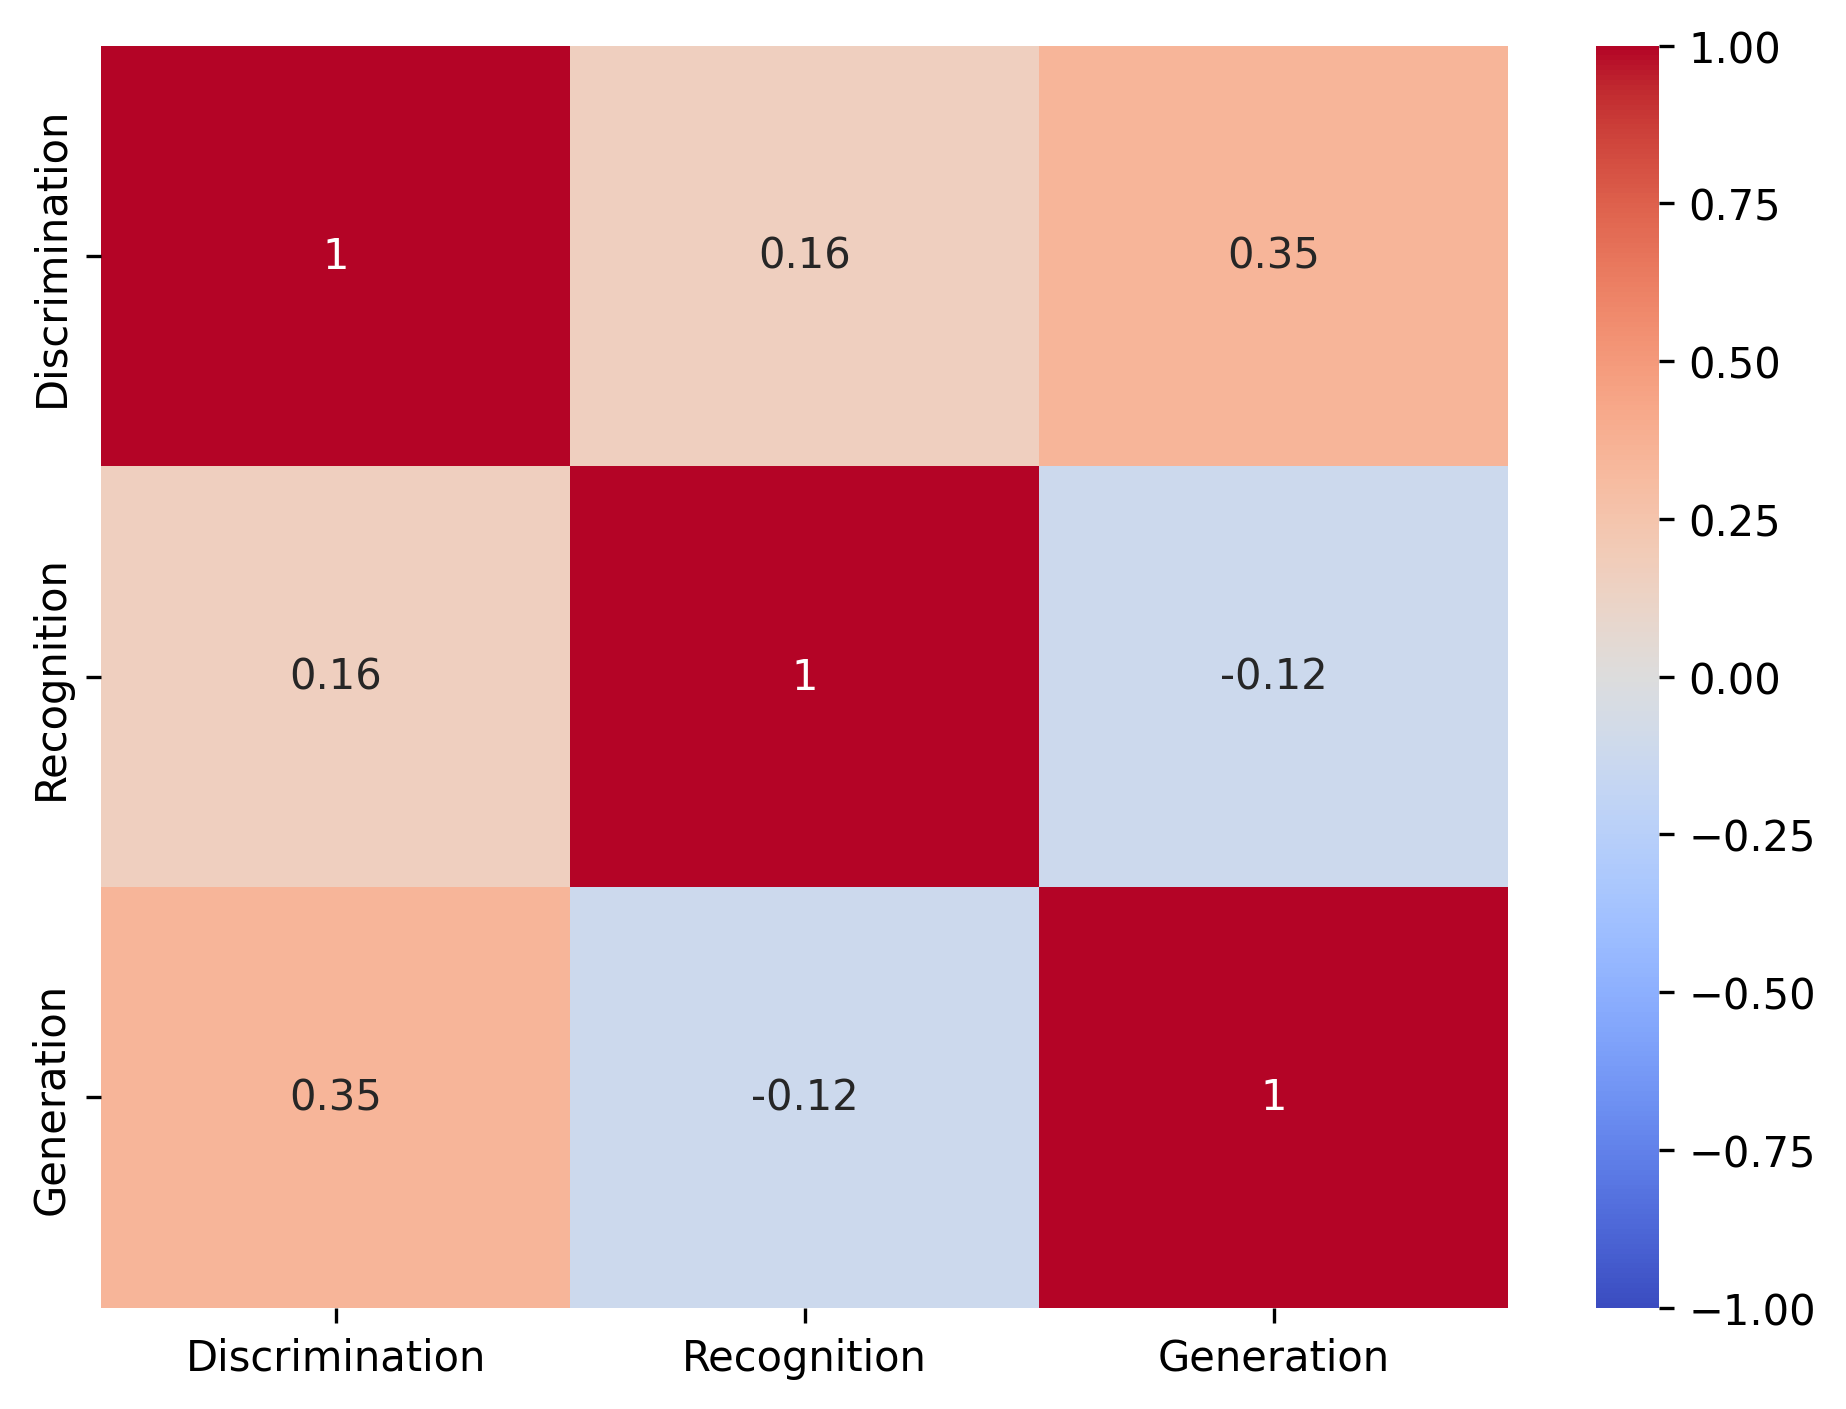

In [80]:
import seaborn as sns
df_item_concept = pd.DataFrame({
    'Discrimination': discrimination.df.groupby('item_id')['concept_response'].mean(),
    'Recognition': recognition.df.groupby('item_id')['concept_response'].mean(),
    'Generation': generation.df.groupby('item_id')['concept_response'].mean()
})
sns.heatmap(df_item_concept[1:].corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.tight_layout()
plt.show()

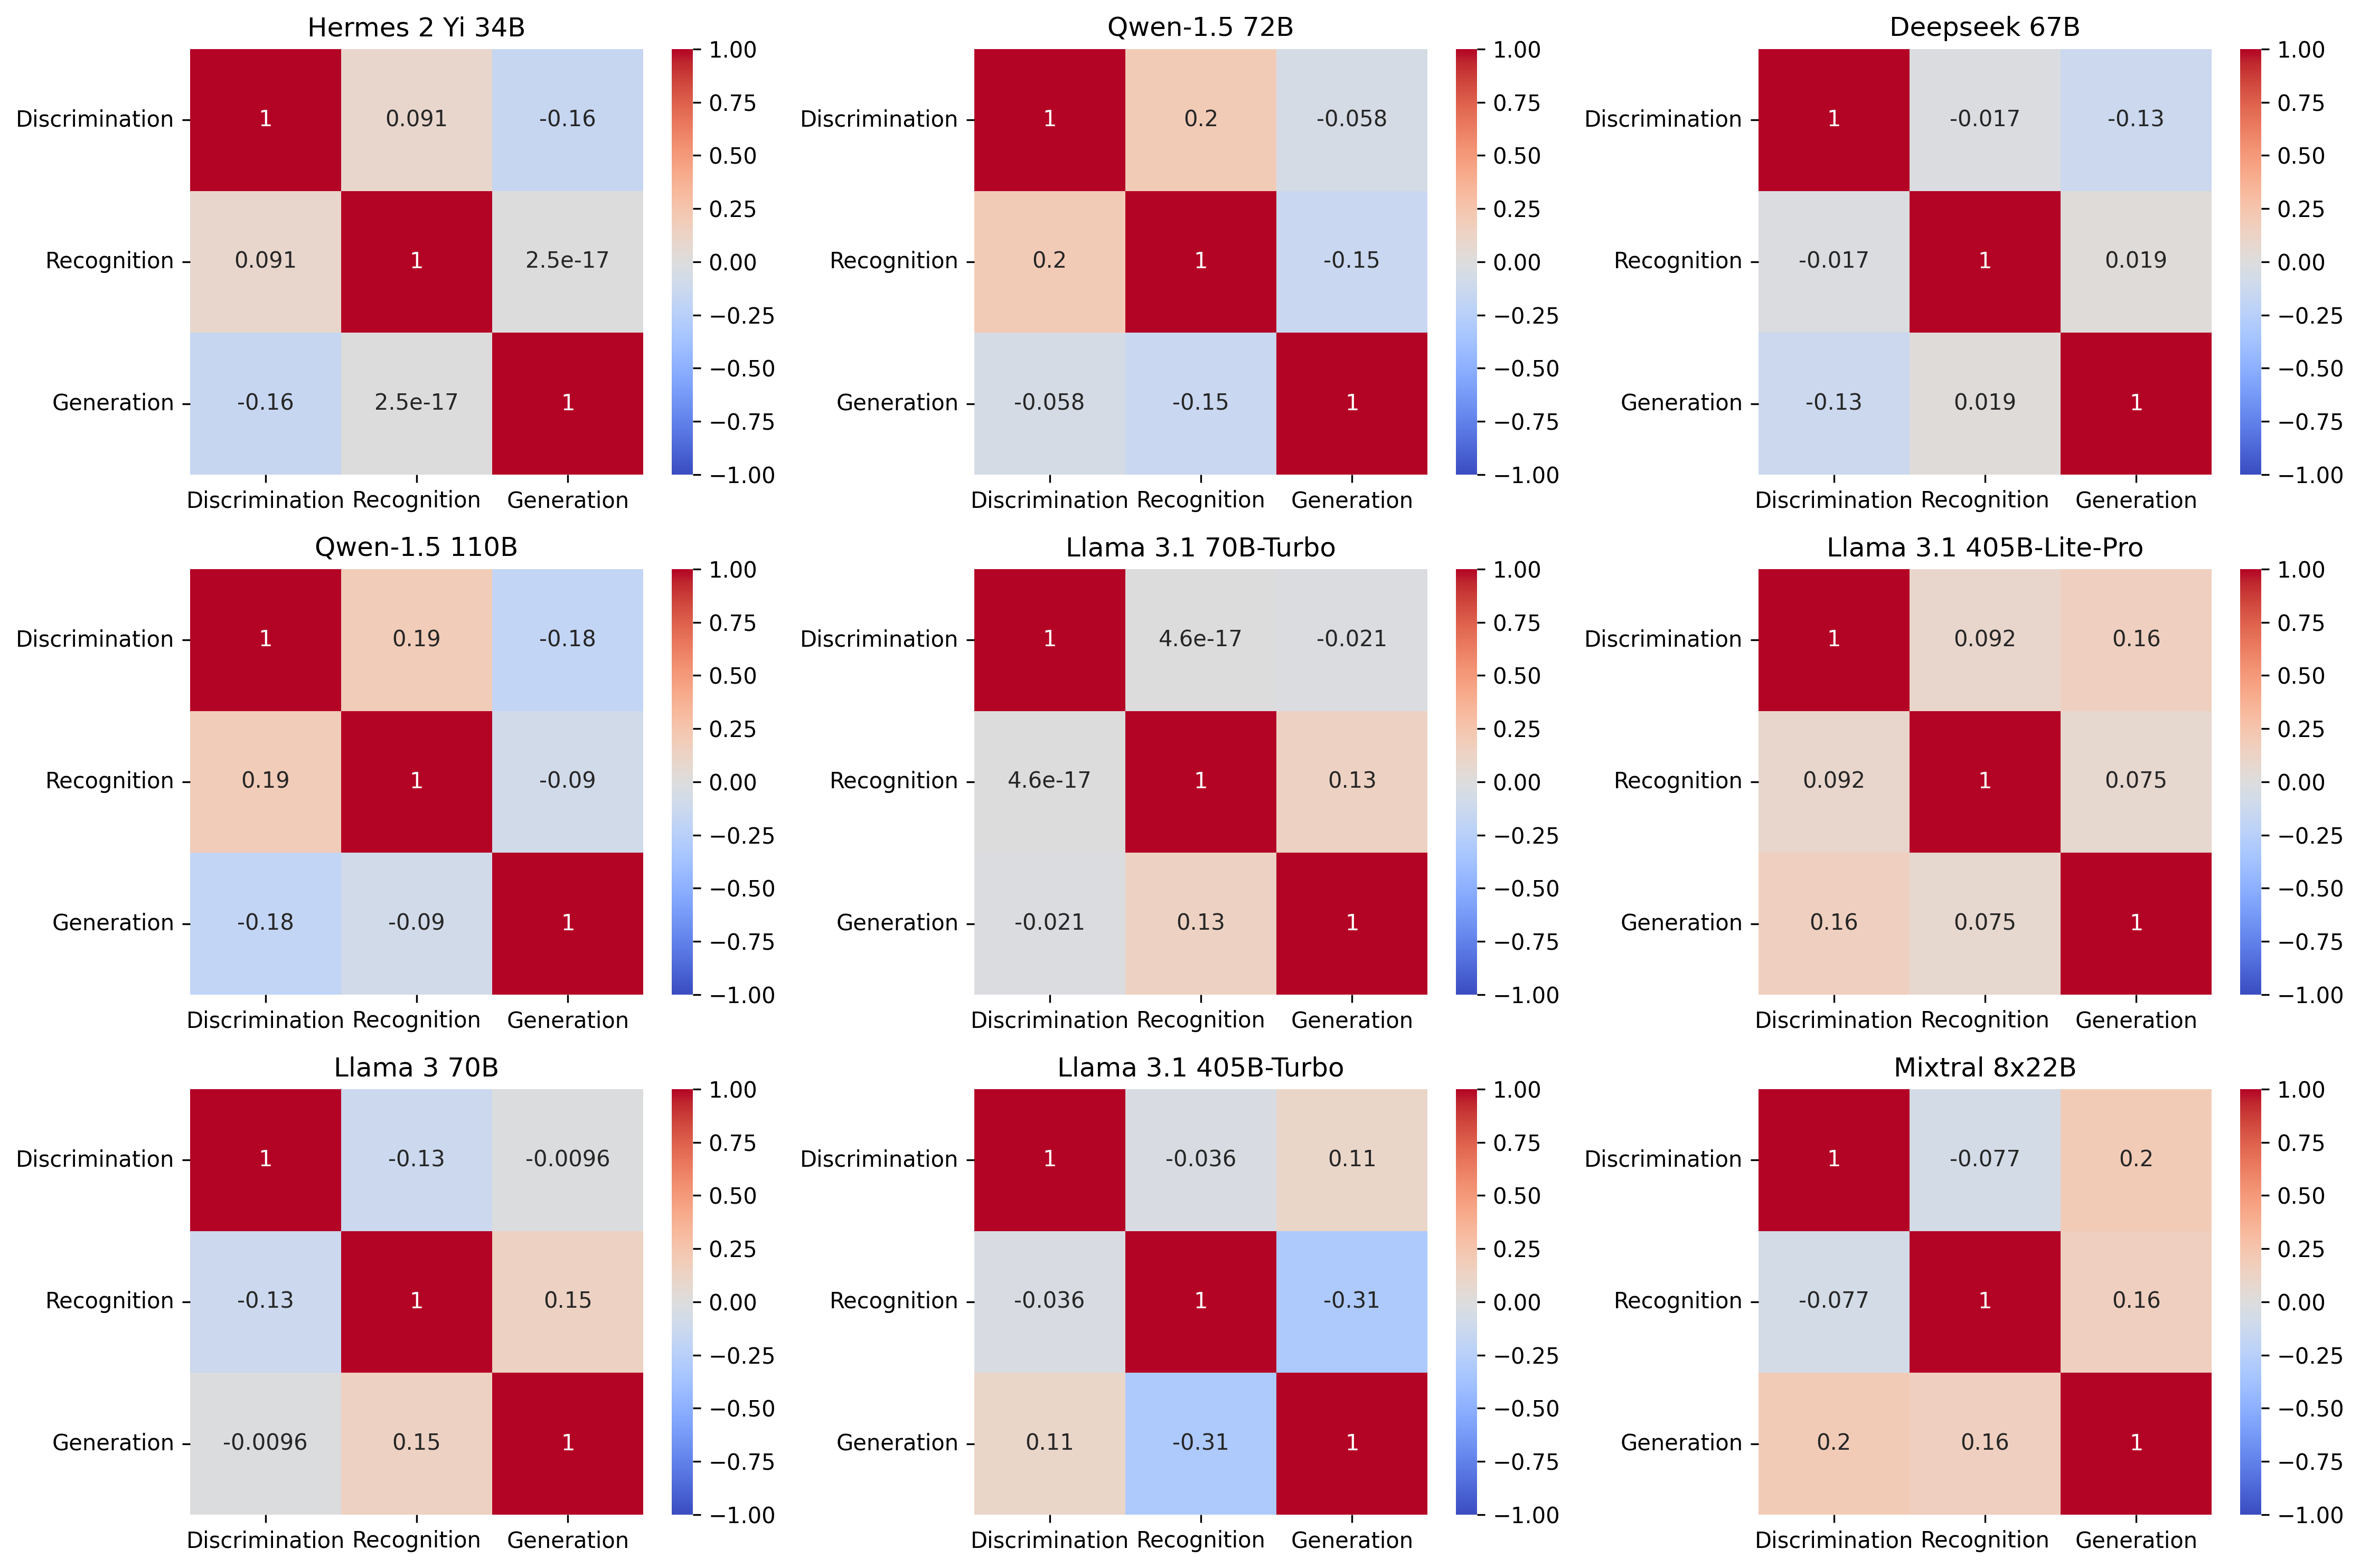

In [125]:
df_con = pd.DataFrame({
    'model': mc_filtered['model'],
    'Discrimination': np.nan,
    'Recognition': np.nan,
    'Generation': np.nan
})
oe_filtered = oe_filtered.loc[oe_filtered['item_id'] != '101']
for model in df_con['model']:
    df_con.loc[df_con['model'] == model, 'Discrimination'] = mc_filtered.loc[mc_filtered['model'] == model, 'concept_response'].values
    df_con.loc[df_con['model'] == model, 'Recognition'] = abcd_filtered.loc[abcd_filtered['model'] == model, 'concept_acc'].astype(float).values
    df_con.loc[df_con['model'] == model, 'Generation'] = oe_filtered.loc[oe_filtered['model'] == model, 'concept_response'].astype(float).values

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, model in enumerate(df_con['model'].unique()):
    df = df_con[df_con['model'] == model]
    sns.heatmap(df[['Discrimination', 'Recognition', 'Generation']].corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(names.get(model.split('/')[1], model))

plt.tight_layout()
plt.show()

In [41]:
recognition.df.groupby('concept_response')['logprobs'].mean()

concept_response
0    0.730518
1    0.796789
Name: logprobs, dtype: object

In [48]:
mc_lp = discrimination.df.groupby('choice')['logprobs'].mean()
mc_lp_err = discrimination.df.groupby('choice')['logprobs'].sem()

abcd_lp = recognition.df.groupby('concept_response')['logprobs'].mean()[1]
abcd_lp_err = recognition.df.groupby('concept_response')['logprobs'].sem()[1]

oe_concept_lp = generation.df.groupby('concept_response')['logprobs'].mean().loc[1]
oe_concept_lp_err = generation.df.groupby('concept_response')['logprobs'].sem().loc[1]
or_matrix_lp = generation.df.groupby('matrix_response')['logprobs'].mean().loc[1]
or_matrix_lp_err = generation.df.groupby('matrix_response')['logprobs'].sem().loc[1]
or_duplication_lp = generation.df.groupby('matrix_response')['logprobs'].mean().loc[1]
or_duplication_lp_err = generation.df.groupby('matrix_response')['logprobs'].sem().loc[1]
oe_other_lp = generation.df.groupby('other_response')['logprobs'].mean().loc[1]
oe_other_lp_err = generation.df.groupby('other_response')['logprobs'].sem().loc[1]

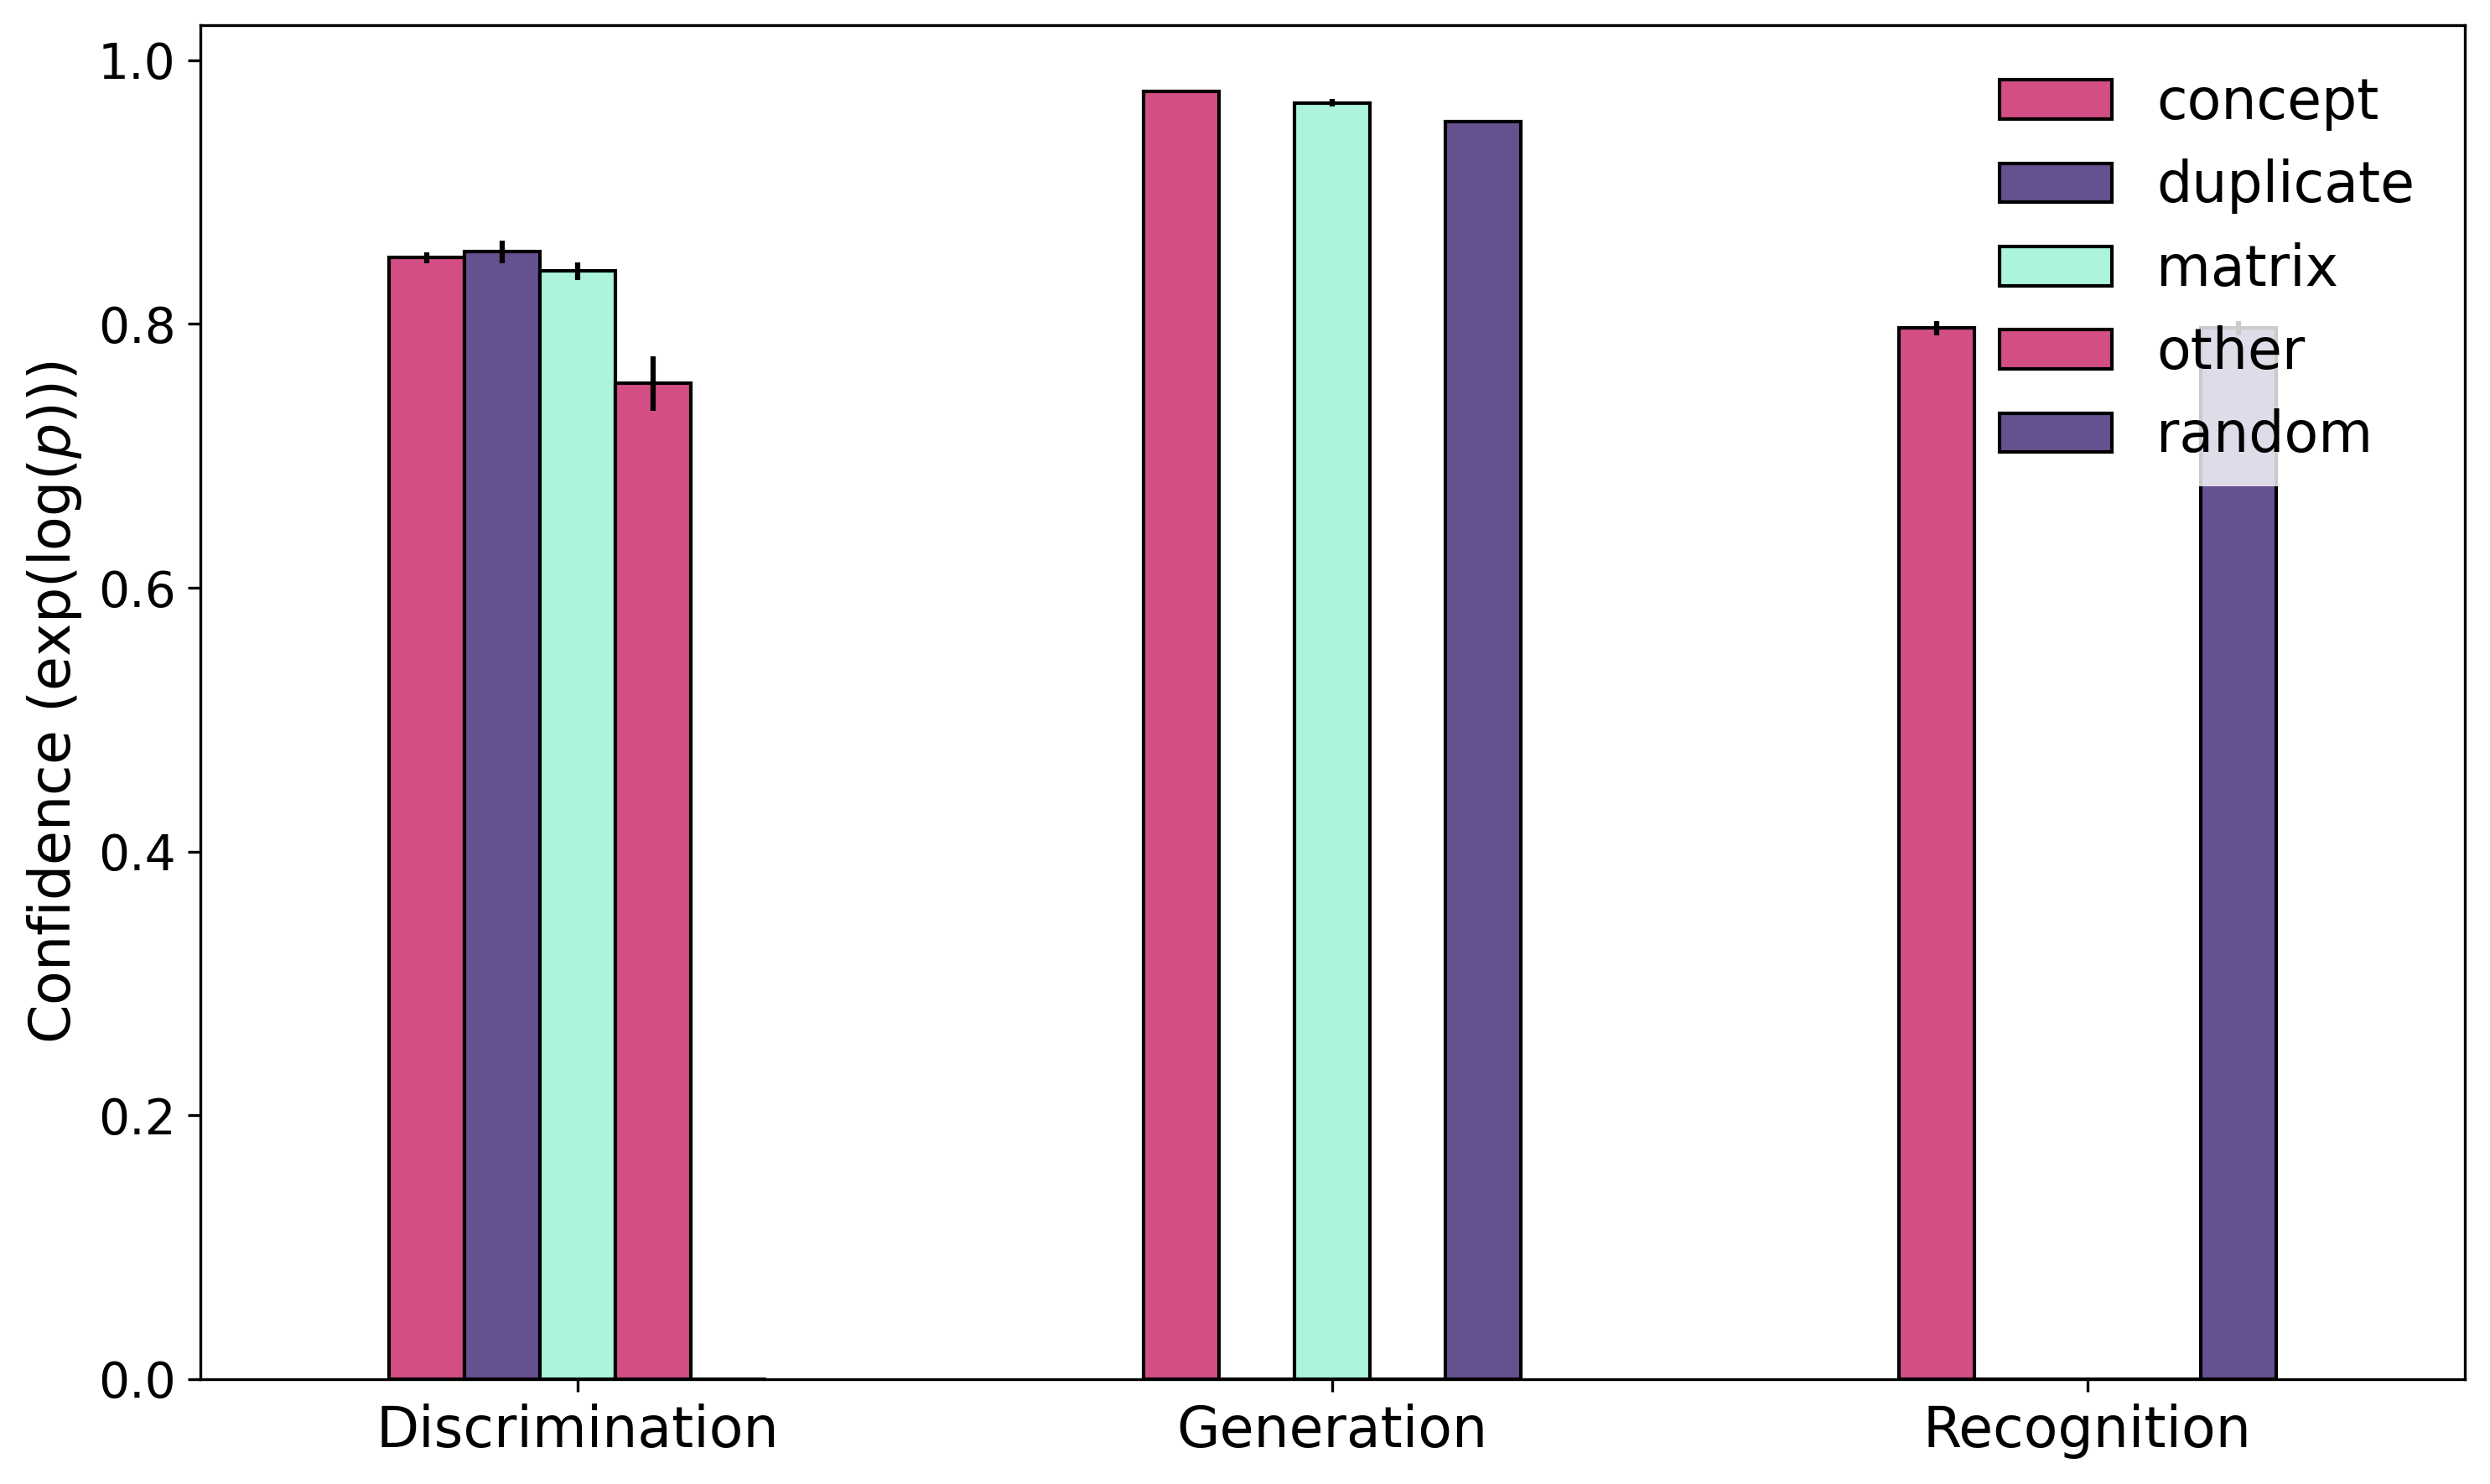

In [50]:
df_lp = pd.DataFrame({
    'Discrimination': mc_lp.to_dict(),
    'Generation': {'concept': oe_concept_lp,
                    'matrix': or_matrix_lp, 
                    'random': oe_other_lp},
    'Recognition': {'concept': abcd_lp,
                    'matrix': np.nan,
                    'random': abcd_lp},
}).T
df_lp_err = pd.DataFrame({
    'Discrimination': mc_lp_err,
    'Generation': {'concept': oe_concept_lp_err,
                   'matrix': or_matrix_lp_err, 
                   'random': oe_other_lp_err},
    'Recognition': {'concept': abcd_lp_err,
                    'matrix': np.nan,
                    'random': abcd_lp_err},
}).T
plt.rcParams['text.usetex'] = False
df_lp.plot(kind='bar', figsize=(10, 6), color=['#d44e86', '#665190', '#adf4dc'], edgecolor='black', yerr=df_lp_err)
plt.ylabel('Confidence ($\\exp(\\log(p))$)', size=16)
plt.xticks(size=16, rotation=0)
plt.yticks(size=14)
plt.legend(fontsize=16, edgecolor='none')
plt.tight_layout()
plt.show()

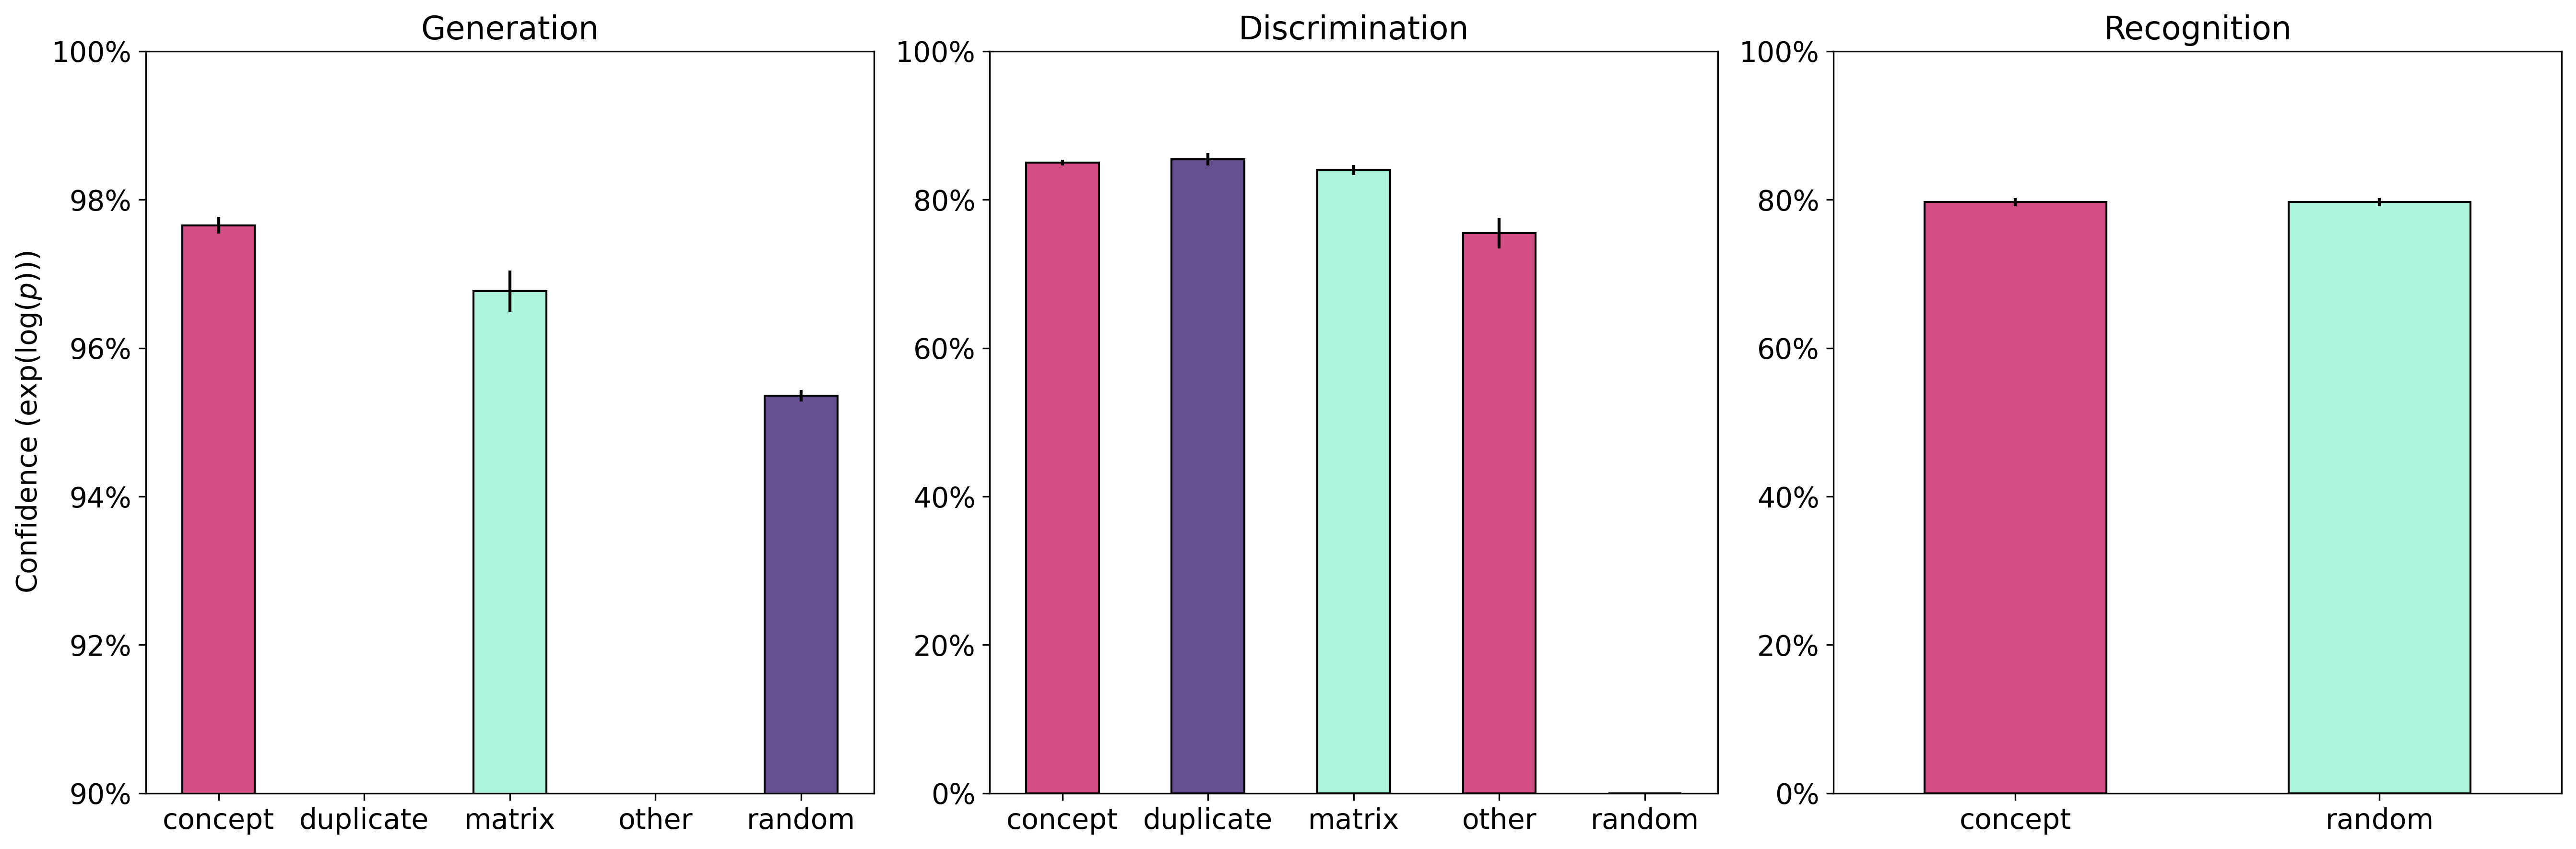

In [51]:
df_lp_t = df_lp.T

# Plot each x category separately in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

df_lp_t['Generation'].plot(kind='bar', ax=axes[0], color=['#d44e86', '#665190', '#adf4dc'], edgecolor='black', yerr=df_lp_err.T['Generation'])
axes[0].set_title('Generation', size=16)
axes[0].tick_params(axis='x', labelsize=14, rotation=0)
axes[0].set_ylabel('Confidence ($\\exp(\\log(p))$)', size=14)
axes[0].set_ylim(0.9, 1)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
axes[0].tick_params(axis='y', labelsize=14)

df_lp_t['Discrimination'].plot(kind='bar', ax=axes[1], color=['#d44e86', '#665190', '#adf4dc'], edgecolor='black', yerr=df_lp_err.T['Discrimination'])
axes[1].set_title('Discrimination', size=16)
axes[1].tick_params(axis='x', labelsize=14, rotation=0)
axes[1].set_ylim(0, 1)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
axes[1].tick_params(axis='y', labelsize=14)

df_lp_t['Recognition'].dropna().plot(kind='bar', ax=axes[2], color=['#d44e86', '#adf4dc'], edgecolor='black', yerr=df_lp_err.T['Recognition'].dropna())
axes[2].set_title('Recognition', size=16)
axes[2].tick_params(axis='x', labelsize=14, rotation=0)
axes[2].set_ylim(0, 1)
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
axes[2].tick_params(axis='y', labelsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Predicting choices

In [203]:
from nltk import edit_distance

# filter items not in dataset
items_data = {
    item_id: item
    for item_id, item in mc_random.dataset.items_data.items()
    if item_id in mc_random.dataset.items
}

edit_distances = {item_id: {} for item_id in items_data.keys()}
for item_id, item in items_data.items():
    # Calculate edit distances between input matrices and the output matrices
    for input_mat in ['A', 'B', 'C']:
        for output_mat in ['D_matrix', 'D_concept', 'D_random']:
            distance = edit_distance(item[input_mat], item[output_mat])
            edit_distances[item_id][f'{input_mat}_{output_mat.split('_')[1]}'] = distance
    
    # Calculate average edit distances between input matrices and the output matrix for all output matrices
    for output_mat in ['D_matrix', 'D_concept', 'D_random']:
        distances = [
            edit_distances[item_id][f'{input_mat}_{output_mat.split('_')[1]}'] 
            for input_mat in ['A', 'B', 'C']
        ]
        edit_distances[item_id][f'{output_mat}_avg'] = np.mean(distances)
    
    # Calculate edit distances between input matrices
    edit_distances[item_id]['A_B'] = edit_distance(item['A'], item['B'])
    edit_distances[item_id]['A_C'] = edit_distance(item['A'], item['C'])
    edit_distances[item_id]['B_C'] = edit_distance(item['B'], item['C'])
    
edit_distances_df = pd.DataFrame(edit_distances).T
edit_distances_df.describe()

,A_matrix,A_concept,A_random,B_matrix,B_concept,B_random,C_matrix,C_concept,C_random,D_matrix_avg,D_concept_avg,D_random_avg,A_B,A_C,B_C
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,10.222222,11.111111,7.377778,6.666667,9.844444,7.533333,5.044444,4.955556,8.622222,7.311111,8.637037,7.844444,5.133333,9.266667,11.155556
std,4.889176,5.292457,3.575732,4.477215,5.431204,3.980635,3.930970,2.946150,5.201787,3.390718,3.865688,3.663635,3.653143,5.369950,5.334091
min,3.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.333333,3.333333,2.000000,1.000000,2.000000,4.000000
25%,6.000000,7.000000,4.000000,4.000000,6.000000,5.000000,2.000000,3.000000,4.000000,4.333333,6.000000,4.333333,2.000000,5.000000,7.000000
50%,9.000000,9.000000,7.000000,6.000000,9.000000,8.000000,4.000000,4.000000,8.000000,7.000000,8.000000,7.333333,4.000000,9.000000,9.000000
75%,14.000000,15.000000,11.000000,8.000000,13.000000,10.000000,7.000000,6.000000,12.000000,10.000000,11.000000,11.000000,6.000000,12.000000,15.000000
max,20.000000,25.000000,14.000000,19.000000,25.000000,19.000000,17.000000,14.000000,25.000000,15.000000,18.666667,15.000000,16.000000,25.000000,25.000000


<Axes: xlabel='item_id'>

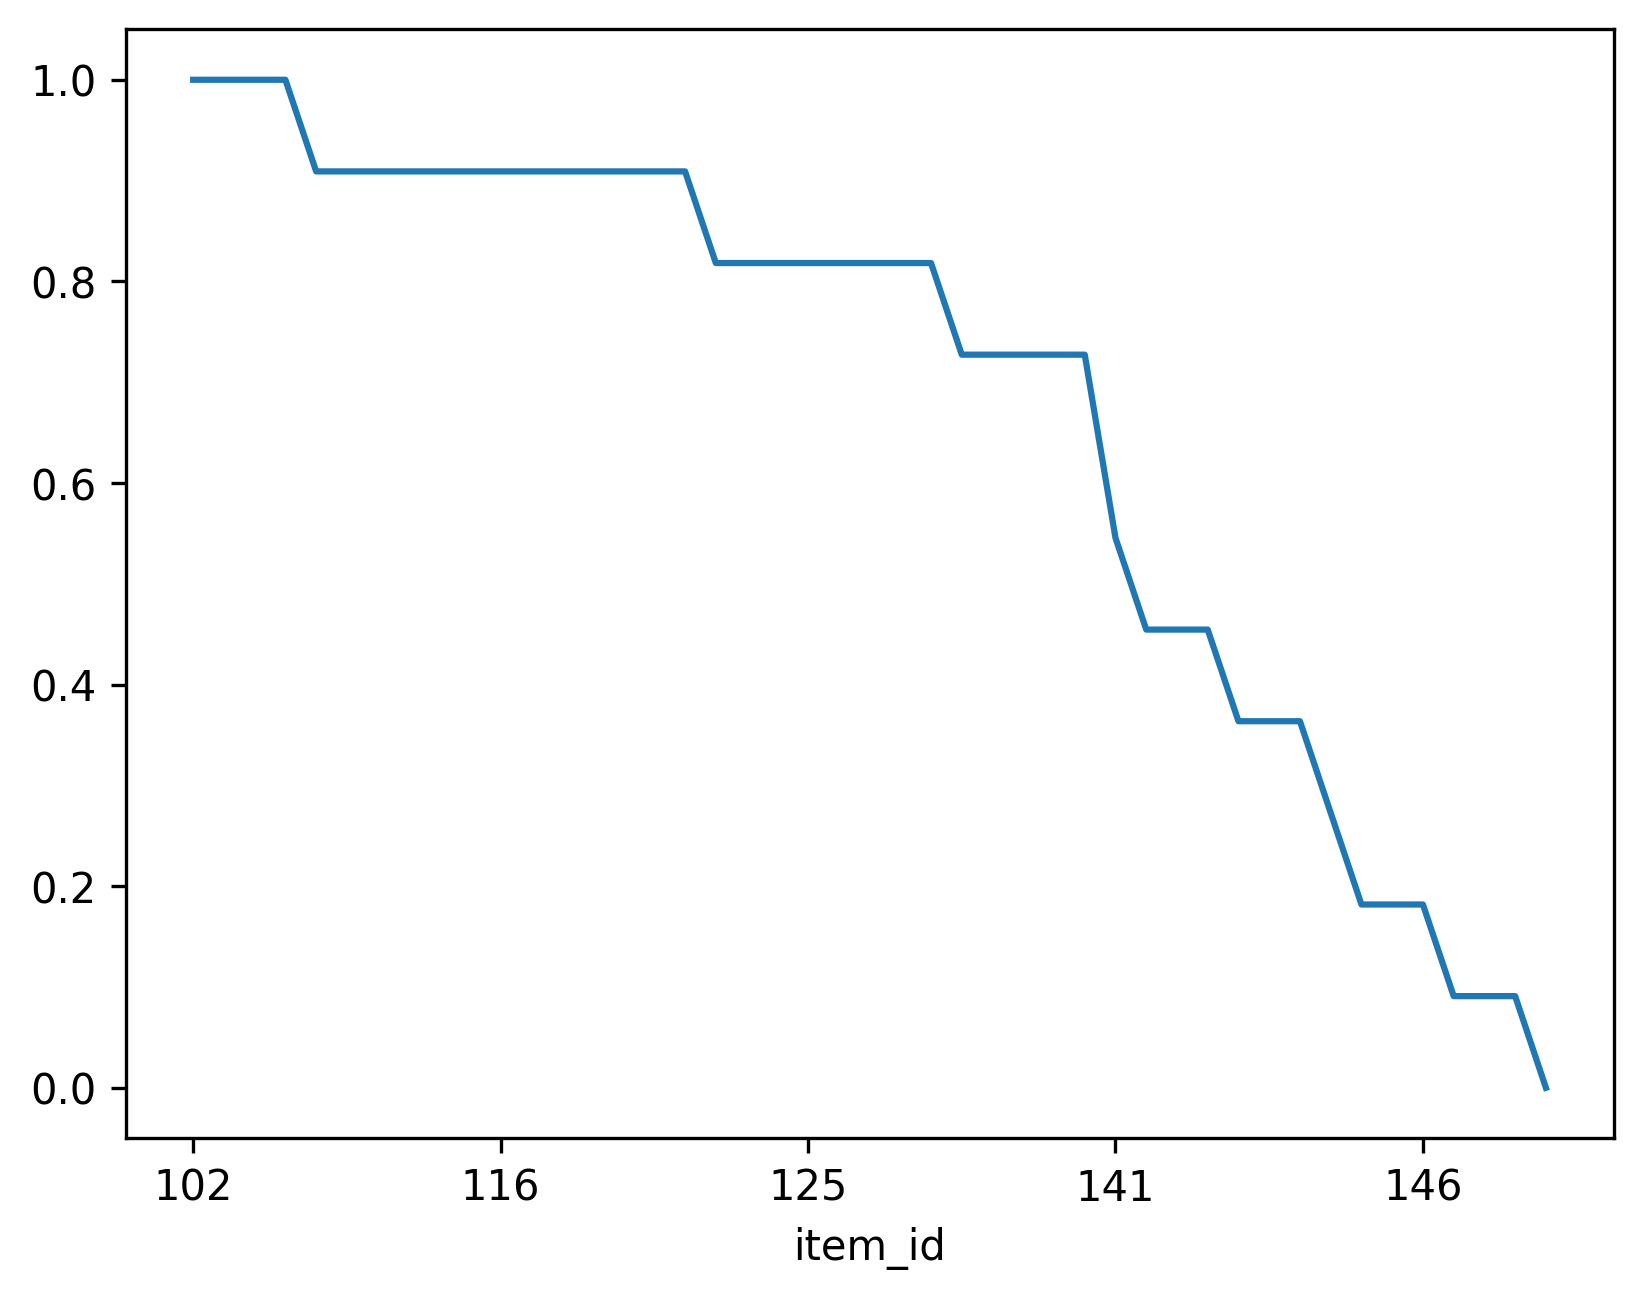

In [272]:
mc_random.df['concept_response'].groupby(mc_random.df['item_id']).mean().sort_values(ascending=False).plot(kind='line')

In [265]:
edit_df = mc_random.df[['item_id', 'model', 'choice']]
edit_df = edit_df.merge(edit_distances_df, left_on='item_id', right_index=True)
edit_df = edit_df[edit_df['choice'] != 'random']

from sklearn.linear_model import LogisticRegression

X = edit_df.drop(columns=['item_id', 'model', 'choice'])
y = edit_df['choice']

lr = LogisticRegression(max_iter=1000)
fit = lr.fit(X, y)

# get importance
importance = lr.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.2f}')

Feature: A_matrix, Score: -0.02
Feature: A_concept, Score: 0.00
Feature: A_random, Score: 0.40
Feature: B_matrix, Score: 0.68
Feature: B_concept, Score: -0.02
Feature: B_random, Score: -0.26
Feature: C_matrix, Score: 0.44
Feature: C_concept, Score: -0.11
Feature: C_random, Score: -0.24
Feature: D_matrix_avg, Score: 0.37
Feature: D_concept_avg, Score: -0.04
Feature: D_random_avg, Score: -0.03
Feature: A_B, Score: 0.23
Feature: A_C, Score: -0.07
Feature: B_C, Score: -0.48


In [ ]:
filtered_df = abcd.df[abcd.df['model'].isin(list(df[df['4 Answer Options'] > 0.3].index))]
filtered_df.groupby('item_id')['concept_acc'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Accuracy')
plt.xticks(ticks=plt.gca().get_xticks(), labels=[])
plt.ylim(0, 1)
plt.show()

In [266]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This returns a numpy array

# Convert back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the features for the intercept term
X_scaled_with_constant = sm.add_constant(X_scaled).reset_index(drop=True)

# Get dummy variables for the target variable
y = pd.get_dummies(y)['concept'].reset_index(drop=True)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_scaled_with_constant)
result = logit_model.fit()

# Get the summary of the logistic regression
summary_table = result.summary2().tables[1]

# Extracting relevant information: coefficients and p-values
coef_pvalues_df = summary_table[['Coef.', 'P>|z|']].reset_index()
coef_pvalues_df.columns = ['Feature', 'Standardized Coefficient', 'P-value']

# sort by p-values
coef_pvalues_df = coef_pvalues_df.sort_values(by='P-value')

styled_df = coef_pvalues_df.style.background_gradient(
    subset=['Standardized Coefficient'], cmap='coolwarm', axis=0
)

# Display the styled DataFrame
styled_df


         Current function value: 0.503825
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Feature,Standardized Coefficient,P-value
0,const,1.131036,0.000000
15,B_C,2.651164,0.000370
13,A_B,-0.858438,0.035476
14,A_C,0.380763,0.284902
4,B_matrix,-2.885601,1.000000
7,C_matrix,-1.567975,1.000000
10,D_matrix_avg,-1.702767,1.000000
1,A_matrix,0.351656,1.000000
2,A_concept,-0.013764,nan
3,A_random,-1.557639,nan


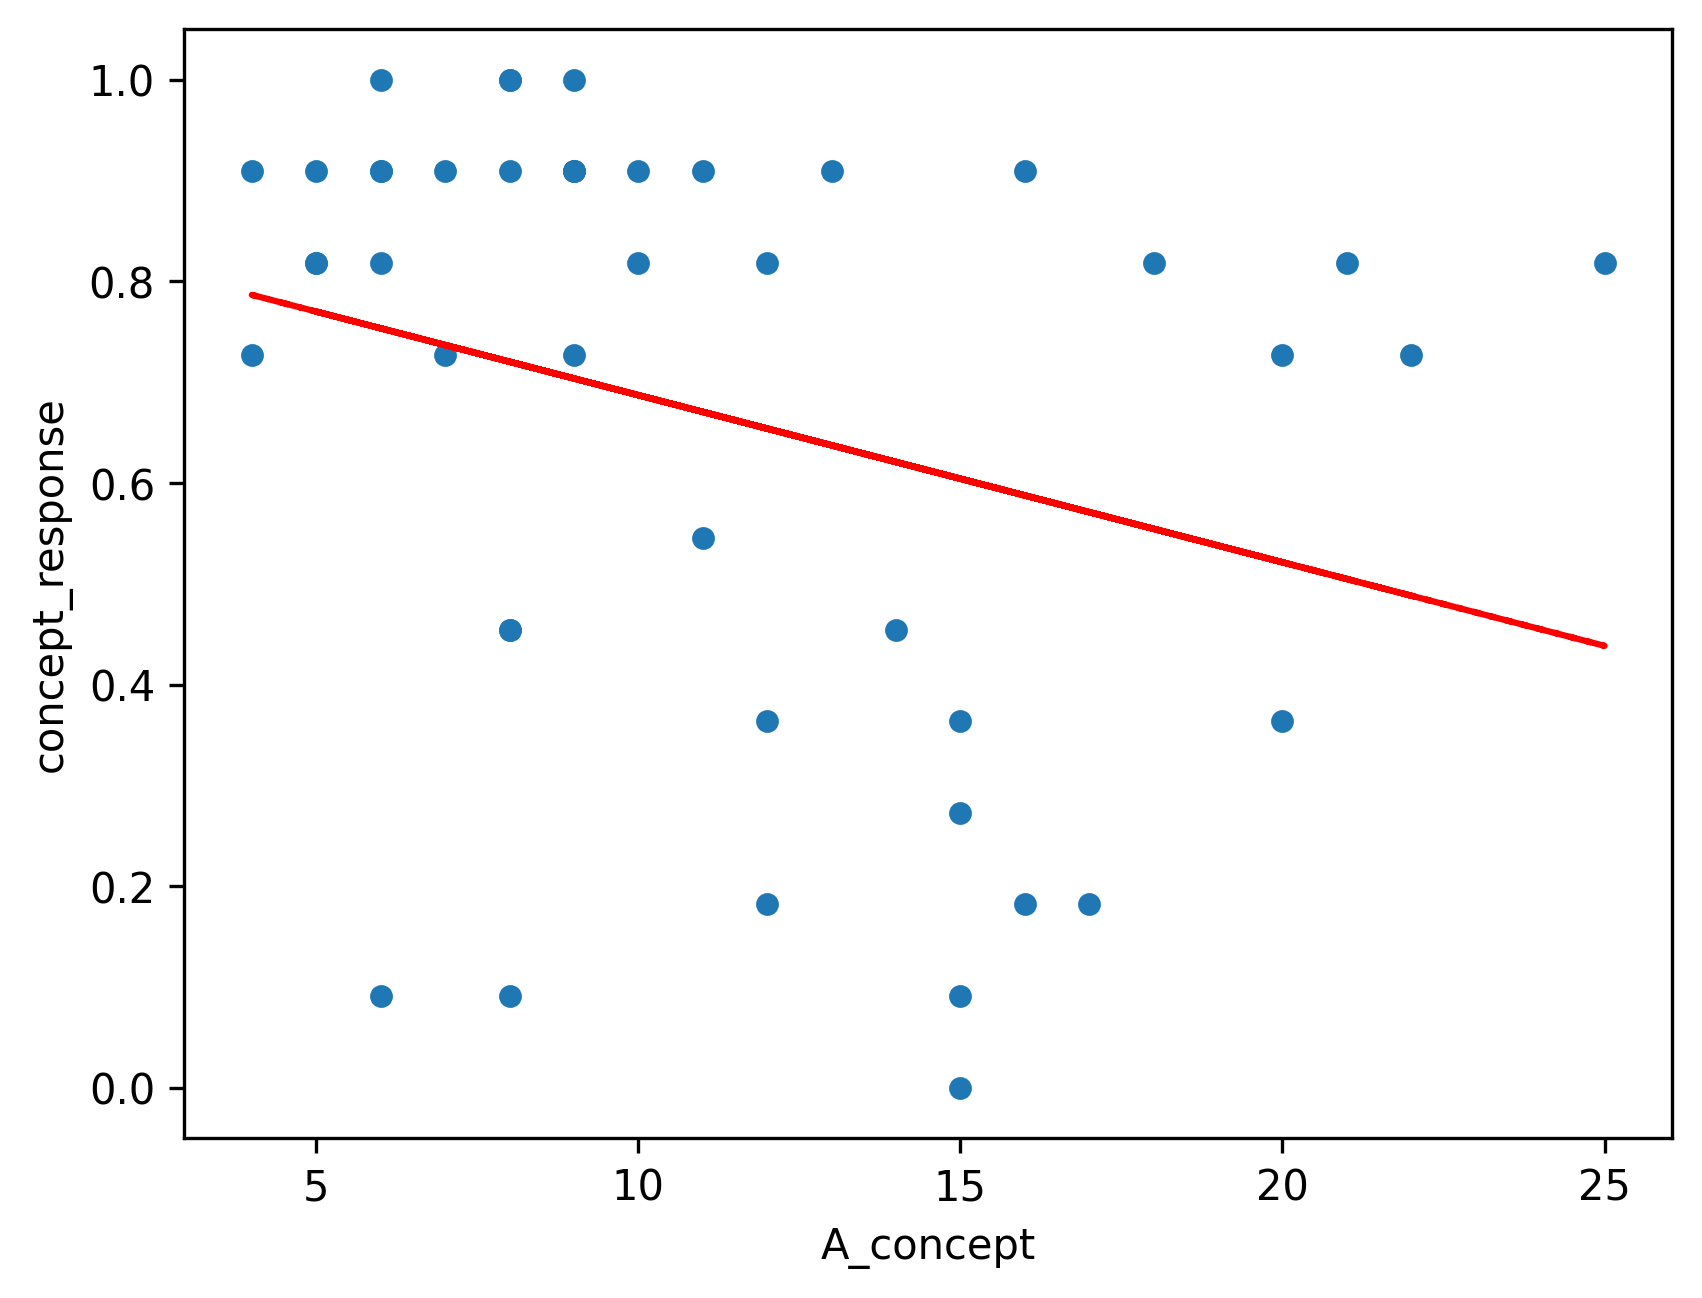

In [286]:
feat = 'A_concept'
df_interp = pd.DataFrame({
    'concept_response': mc_random.df['concept_response'].groupby(mc_random.df['item_id']).mean(),
    feat: edit_distances_df[feat],
})
df_interp.plot(kind='scatter', x=feat, y='concept_response')
# Add a trendline
z = np.polyfit(df_interp[feat], df_interp['concept_response'], 1)
p = np.poly1d(z)
plt.plot(df_interp[feat], p(df_interp[feat]), 'r--')
plt.show()


In [273]:
mc_random.df['concept_response'].groupby(mc_random.df['item_id']).mean()

item_id
102    1.000000
103    0.909091
104    0.727273
105    1.000000
106    0.909091
107    0.818182
108    0.909091
109    0.909091
110    0.909091
111    1.000000
112    0.909091
113    0.727273
114    0.909091
115    0.818182
116    0.909091
117    0.727273
118    0.818182
119    0.090909
120    0.454545
121    0.818182
122    0.818182
123    0.909091
124    0.909091
125    0.818182
126    0.909091
127    0.727273
128    0.363636
129    0.181818
130    0.454545
131    0.363636
132    0.454545
133    0.909091
134    0.818182
135    0.272727
136    0.909091
137    0.818182
138    0.090909
139    0.727273
140    0.090909
141    0.545455
142    0.000000
143    1.000000
144    0.181818
145    0.363636
146    0.181818
Name: concept_response, dtype: float64

In [244]:
X_scaled

,A_matrix,A_concept,A_random,B_matrix,B_concept,B_random,C_matrix,C_concept,C_random,D_matrix_avg,D_concept_avg,D_random_avg,A_B,A_C,B_C
0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
1,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
2,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
3,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
4,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
463,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
464,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
465,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425


In [245]:
X_scaled_with_constant

,const,A_matrix,A_concept,A_random,B_matrix,B_concept,B_random,C_matrix,C_concept,C_random,D_matrix_avg,D_concept_avg,D_random_avg,A_B,A_C,B_C
0,1.0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
1,1.0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
2,1.0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
3,1.0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
4,1.0,-1.273845,-0.966939,-0.940000,-0.372732,-0.711653,-0.649606,-1.038638,-1.340236,-0.687552,-1.173723,-1.111268,-0.864508,-1.141364,-0.79805,-0.967010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1.0,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
463,1.0,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
464,1.0,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425
465,1.0,0.597518,1.149450,1.309737,-0.372732,0.965901,1.430023,2.371623,0.377355,-0.298827,1.027597,1.068513,0.794637,0.825488,1.08422,1.133425


<Axes: >

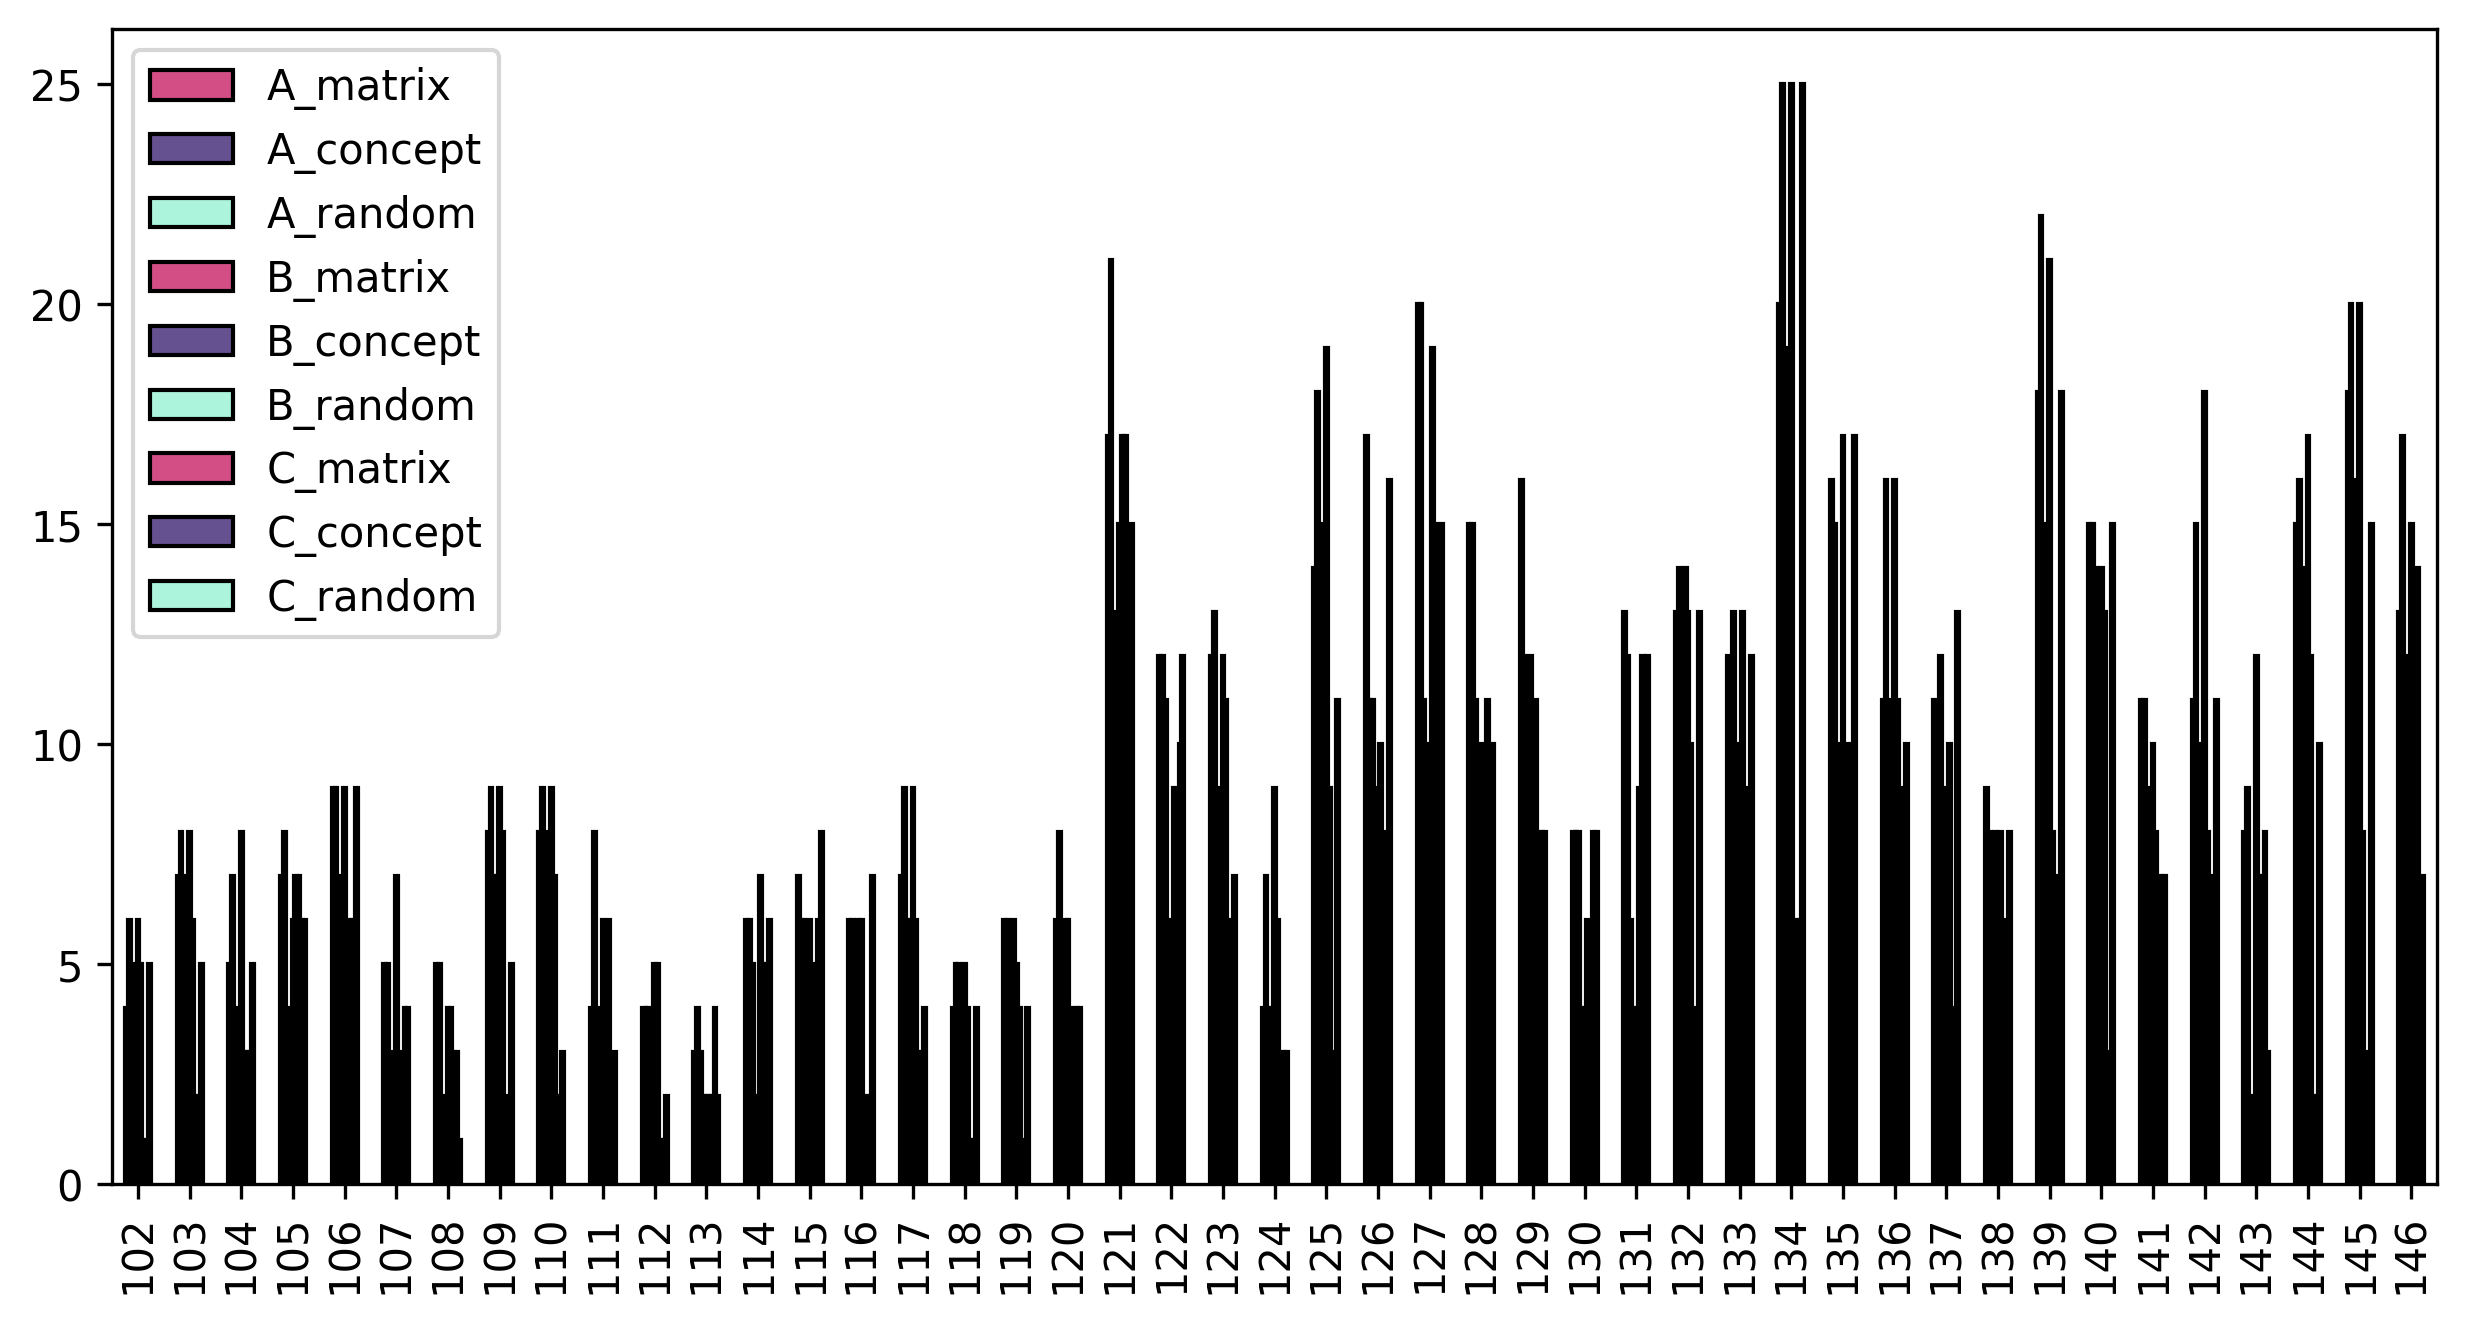

In [171]:
edit_distances_df.plot(kind='bar', figsize=(10, 5), color=['#d44e86', '#665190', '#adf4dc'], edgecolor='black')

In [163]:
edit_distances

{'102_A_matrix': 4,
 '102_A_concept': 6,
 '102_A_random': 4,
 '102_B_matrix': 5,
 '102_B_concept': 6,
 '102_B_random': 5,
 '102_C_matrix': 1,
 '102_C_concept': 1,
 '102_C_random': 5,
 '103_A_matrix': 7,
 '103_A_concept': 8,
 '103_A_random': 7,
 '103_B_matrix': 6,
 '103_B_concept': 8,
 '103_B_random': 6,
 '103_C_matrix': 2,
 '103_C_concept': 2,
 '103_C_random': 5,
 '104_A_matrix': 5,
 '104_A_concept': 7,
 '104_A_random': 3,
 '104_B_matrix': 4,
 '104_B_concept': 8,
 '104_B_random': 3,
 '104_C_matrix': 3,
 '104_C_concept': 3,
 '104_C_random': 5,
 '105_A_matrix': 7,
 '105_A_concept': 8,
 '105_A_random': 4,
 '105_B_matrix': 1,
 '105_B_concept': 6,
 '105_B_random': 7,
 '105_C_matrix': 7,
 '105_C_concept': 6,
 '105_C_random': 6,
 '106_A_matrix': 9,
 '106_A_concept': 9,
 '106_A_random': 7,
 '106_B_matrix': 3,
 '106_B_concept': 9,
 '106_B_random': 4,
 '106_C_matrix': 6,
 '106_C_concept': 6,
 '106_C_random': 9,
 '107_A_matrix': 5,
 '107_A_concept': 5,
 '107_A_random': 3,
 '107_B_matrix': 2,
 '10

In [157]:
for 
    input_matrices

['0100122222010010100101001',
 '0000022222000000000000000',
 '1010010100222221010022222']

In [150]:
mc_random.dataset.items_data.keys() 

dict_keys(['example', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146'])

In [153]:
{k: v for k, v in mc_random.dataset.items_data.items() if k in mc_random.dataset.items}

{'102': {'xdim': 3,
  'ydim': 3,
  'A': '030232030',
  'B': '030222030',
  'C': '300311300',
  'D_matrix': '300321300',
  'D_concept': '300111300',
  'concept': 'top_and_bottom_3d',
  'D_random': '233033030'},
 '103': {'xdim': 3,
  'ydim': 3,
  'A': '550005555',
  'B': '555505555',
  'C': '606606066',
  'D_matrix': '605506066',
  'D_concept': '666606666',
  'concept': 'complete_shape',
  'D_random': '605555606'},
 '104': {'xdim': 3,
  'ydim': 3,
  'A': '006060600',
  'B': '006066666',
  'C': '200020002',
  'D_matrix': '200026066',
  'D_concept': '222022002',
  'concept': 'filled_and_not_filled',
  'D_random': '000066060'},
 '105': {'xdim': 3,
  'ydim': 3,
  'A': '222300550',
  'B': '300550222',
  'C': '110444600',
  'D_matrix': '310550222',
  'D_concept': '600110444',
  'concept': 'order',
  'D_random': '510305550'},
 '106': {'xdim': 3,
  'ydim': 3,
  'A': '000555222',
  'B': '000222555',
  'C': '111777000',
  'D_matrix': '111222555',
  'D_concept': '777111000',
  'concept': 'top_and_b

In [152]:
for k, v in mc_random.dataset.items_data.
    print(k, v)

ValueError: too many values to unpack (expected 2)

In [146]:
mc_random.dataset.items

['102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146']